# 🏠  Predicting House Prices: EDA and Data-Driven Approach Using Advanced Regression Techniques


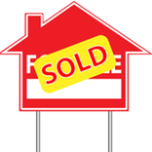

## 📊 Introduction

The aim of this task is to predict the sale price for each property in the dataset. Given that the target value is a continuous variable we will consider regression ML models. 

#### Import Libraries

In [361]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly as py
import plotly.express as px

import statsmodels.api as sm

In [362]:
# load training data 
train_data = pd.read_csv(r"C:\Users\Krupa\Downloads\train.csv")
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [363]:
train_data.shape

(1460, 81)

The test data consists of various property information, ranging from plot size to the type of foundation. In total there are 79 property features and 1,460 properties. 

### 🧹 Data Preprocessing

In [364]:
# summarise /check test data 

def check_data(df):
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns] 
    
    df_check = pd.DataFrame(summary, columns = ['column', 'dtype', 'instances', 'unique', 'missing_vals', 'duplicates'])
    pd.set_option('display.max_rows', None),
    pd.set_option('display.max_columns', None),
    pd.set_option('display.precision', 3)
                       
    return df_check

In [365]:
check_data(train_data)

column    dtype  instances  unique  missing_vals  duplicates
0              Id    int64       1460    1460             0           0
1      MSSubClass    int64       1460      15             0           0
2        MSZoning   object       1460       5             0           0
3     LotFrontage  float64       1201     110           259           0
4         LotArea    int64       1460    1073             0           0
5          Street   object       1460       2             0           0
6           Alley   object         91       2          1369           0
7        LotShape   object       1460       4             0           0
8     LandContour   object       1460       4             0           0
9       Utilities   object       1460       2             0           0
10      LotConfig   object       1460       5             0           0
11      LandSlope   object       1460       3             0           0
12   Neighborhood   object       1460      25             0           0
13     Condition1   object       1460       9             0           0
14     Condition2   object       1460       8             0           0
15       BldgType   object       1460       5             0           0
16     HouseStyle   object       1460       8             0           0
17    OverallQual    int64       1460      10             0           0
18    OverallCond    int64       1460       9             0           0
19      YearBuilt    int64       1460     112             0           0
20   YearRemodAdd    int64       1460      61             0           0
21      RoofStyle   object       1460       6             0           0
22       RoofMatl   object       1460       8             0           0
23    Exterior1st   object       1460      15             0           0
24    Exterior2nd   object       1460      16             0           0
25     MasVnrType   object        588       3           872           0
26     MasVnrArea  float64       1452     327             8           0
27      ExterQual   object       1460       4             0           0
28      ExterCond   object       1460       5             0           0
29     Foundation   object       1460       6             0           0
30       BsmtQual   object       1423       4            37           0
31       BsmtCond   object       1423       4            37           0
32   BsmtExposure   object       1422       4            38           0
33   BsmtFinType1   object       1423       6            37           0
34     BsmtFinSF1    int64       1460     637             0           0
35   BsmtFinType2   object       1422       6            38           0
36     BsmtFinSF2    int64       1460     144             0           0
37      BsmtUnfSF    int64       1460     780             0           0
38    TotalBsmtSF    int64       1460     721             0           0
39        Heating   object       1460       6             0           0
40      HeatingQC   object       1460       5             0           0
41     CentralAir   object       1460       2             0           0
42     Electrical   object       1459       5             1           0
43       1stFlrSF    int64       1460     753             0           0
44       2ndFlrSF    int64       1460     417             0           0
45   LowQualFinSF    int64       1460      24             0           0
46      GrLivArea    int64       1460     861             0           0
47   BsmtFullBath    int64       1460       4             0           0
48   BsmtHalfBath    int64       1460       3             0           0
49       FullBath    int64       1460       4             0           0
50       HalfBath    int64       1460       3             0           0
51   BedroomAbvGr    int64       1460       8             0           0
52   KitchenAbvGr    int64       1460       4             0           0
53    KitchenQual   object       1460       4             0           0
54   TotRmsAbvGrd    int64       1460      12      

#### Handle Missing Values

The columns with over half of missing values are:- 

- Alley : describes the type of alley access (i.e. Gravel, paving or no alley access)
- PoolQC : rated Excellent, Good, Average/Typical, Fair or No pool  
- Fence : rated Good Privacy, Minimum Privacy, Good Wood, Minimum Wood/Wire or No Fence
- MiscFeature : indicates if there are additional features such as an elevator, shed (over 100sq/ft), second garage, tennis court, other or none 
- Masonry veneer Type: describes the masonry finish (i.e. brick, stone etc.)
   
Given the number of missing values in these columns, I think it would be reasonable to drop them. Also, I do not think they are likely to have a large impact on the sales prices. 

In [366]:
# drop columns with large number of missing values
train_data.drop(columns=['PoolQC','Alley','Fence','MiscFeature','MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [367]:
# import libraries 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [368]:
# Identify numeric and categorical columns
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

categorical_features = train_data.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

# Fit on training data
imputed_data = preprocessor.fit_transform(train_data)

# Convert the result back to a dataframe
imputed_df = pd.DataFrame(imputed_data, columns=numeric_features.tolist()+ categorical_features.tolist())

In [369]:
imputed_df.head()

Id MSSubClass LotFrontage  LotArea OverallQual OverallCond YearBuilt   
0  1.0       60.0        65.0   8450.0         7.0         5.0    2003.0  \
1  2.0       20.0        80.0   9600.0         6.0         8.0    1976.0   
2  3.0       60.0        68.0  11250.0         7.0         5.0    2001.0   
3  4.0       70.0        60.0   9550.0         7.0         5.0    1915.0   
4  5.0       60.0        84.0  14260.0         8.0         5.0    2000.0   

  YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF   
0       2003.0      196.0      706.0        0.0     150.0       856.0  \
1       1976.0        0.0      978.0        0.0     284.0      1262.0   
2       2002.0      162.0      486.0        0.0     434.0       920.0   
3       1970.0        0.0      216.0        0.0     540.0       756.0   
4       2000.0      350.0      655.0        0.0     490.0      1145.0   

  1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath   
0    856.0    854.0          0.0    1710.0          1.0          0.0      2.0  \
1   1262.0      0.0          0.0    1262.0          0.0          1.0      2.0   
2    920.0    866.0          0.0    1786.0          1.0          0.0      2.0   
3    961.0    756.0          0.0    1717.0          1.0          0.0      1.0   
4   1145.0   1053.0          0.0    2198.0          1.0          0.0      2.0   

  HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt   
0      1.0          3.0          1.0          8.0        0.0      2003.0  \
1      0.0          3.0          1.0          6.0        1.0      1976.0   
2      1.0          3.0          1.0          6.0        1.0      2001.0   
3      0.0          3.0          1.0          7.0        1.0      1998.0   
4      1.0          4.0          1.0          9.0        1.0      2000.0   

  GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch   
0        2.0      548.0        0.0        61.0           0.0       0.0  \
1        2.0      460.0      298.0         0.0           0.0       0.0   
2        2.0      608.0        0.0        42.0           0.0       0.0   
3        3.0      642.0        0.0        35.0         272.0       0.0   
4        3.0      836.0      192.0        84.0           0.0       0.0   

  ScreenPorch PoolArea MiscVal MoSold  YrSold SalePrice MSZoning Street   
0         0.0      0.0     0.0    2.0  2008.0  208500.0       RL   Pave  \
1         0.0      0.0     0.0    5.0  2007.0  181500.0       RL   Pave   
2         0.0      0.0     0.0    9.0  2008.0  223500.0       RL   Pave   
3         0.0      0.0     0.0    2.0  2006.0  140000.0       RL   Pave   
4         0.0      0.0     0.0   12.0  2008.0  250000.0       RL   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd   
0       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd  \
1       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1   
0        Gd        TA      PConc       Gd       TA           No          GLQ  \
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn         

In [372]:
#correct dtypes of imputed columns 
imputed_df[numeric_features] = imputed_df[numeric_features].astype(float)

In [373]:
train_data_imp = pd.concat([imputed_df, train_data.drop(categorical_features.tolist()+ numeric_features.tolist(), axis=1)], axis=1)
train_data = train_data_imp 
train_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0  \
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0        2003.0       196.0       706.0         0.0      150.0        856.0  \
1        1976.0         0.0       978.0         0.0      284.0       1262.0   
2        2002.0       162.0       486.0         0.0      434.0        920.0   
3        1970.0         0.0       216.0         0.0      540.0        756.0   
4        2000.0       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0     856.0     854.0           0.0     1710.0           1.0           0.0  \
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       2.0       1.0           3.0           1.0           8.0         0.0  \
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice MSZoning Street LotShape LandContour Utilities LotConfig   
0   208500.0       RL   Pave      Reg         Lvl    AllPub    Inside  \
1   181500.0       RL   Pave      Reg         Lvl    AllPub       FR2   
2   223500.0       RL   Pave      IR1         Lvl    AllPub    Inside   
3   140000.0       RL   Pave      IR1         Lvl    AllPub    Corner   
4   250000.0       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle   
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  \
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual   
0  CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd  \
1  CompShg     MetalSd     MetalSd        TA        TA     CBlock       Gd   
2  CompShg     VinylSd     VinylSd        Gd        TA      PConc 

In [374]:
train_data.shape

(1460, 75)

In [375]:
# let's review the stats 
train_data.describe()

Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond   
count  1460.00    1460.000     1460.000    1460.000     1460.000     1460.000  \
mean    730.50      56.897       69.864   10516.828        6.099        5.575   
std     421.61      42.301       22.028    9981.265        1.383        1.113   
min       1.00      20.000       21.000    1300.000        1.000        1.000   
25%     365.75      20.000       60.000    7553.500        5.000        5.000   
50%     730.50      50.000       69.000    9478.500        6.000        5.000   
75%    1095.25      70.000       79.000   11601.500        7.000        6.000   
max    1460.00     190.000      313.000  215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
count   1460.000      1460.000    1460.000    1460.000    1460.000   1460.000  \
mean    1971.268      1984.866     103.117     443.640      46.549    567.240   
std       30.203        20.645     180.731     456.098     161.319    441.867   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
25%     1954.000      1967.000       0.000       0.000       0.000    223.000   
50%     1973.000      1994.000       0.000     383.500       0.000    477.500   
75%     2000.000      2004.000     164.250     712.250       0.000    808.000   
max     2010.000      2010.000    1600.000    5644.000    1474.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath   
count     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000  \
mean      1057.429  1162.627   346.992         5.845   1515.464         0.425   
std        438.705   386.588   436.528        48.623    525.480         0.519   
min          0.000   334.000     0.000         0.000    334.000         0.000   
25%        795.750   882.000     0.000         0.000   1129.500         0.000   
50%        991.500  1087.000     0.000         0.000   1464.000         0.000   
75%       1298.250  1391.250   728.000         0.000   1776.750         1.000   
max       6110.000  4692.000  2065.000       572.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
count      1460.000  1460.000  1460.000      1460.000      1460.000  \
mean          0.058     1.565     0.383         2.866         1.047   
std           0.239     0.551     0.503         0.816         0.220   
min           0.000     0.000     0.000         0.000         0.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
max           2.000     3.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea   
count      1460.000    1460.000     1460.000    1460.000    1460.000  \
mean          6.518       0.613     1978.589       1.767     472.980   
std           1.625       0.645       23.997       0.747     213.805   
min           2.000       0.000     1900.000       0.000       0.000   
25%           5.000       0.000     1962.000       1.000     334.500   
50%           6.000       1.000     1980.000       2.000     480.000   
75%           7.000       1.000     2001.000       2.000     576.000   
max          14.000       3.000     2010.000       4.000    1418.000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   
count    1460.000     1460.000       1460.000   1460.000     1460.000  \
mean       94.245       46.660         21.954      3.410       15.061   
std       125.339       66.256         61.119     29.317       55.757   
min         0.000        0.000          0.000      0.000        0.000   
25%         0.000        0.000          0.000      0.000        0.000   
50%         0.000       25.000          0.000      0.000        0.000   
75%       168.000     

From the stats, we can understand the following: -
    
- The average house price is 180921 with the cheapest being 34900 and the most expensive being 755000
- The average lot area is 10,516 sq/ft
- The oldest property built was in 1872 and the most recent property built was 2010
- On average properties have between 2 to 3 bedrooms, with the most being 8 and the lowest being 0. 
- The average number of bathrooms is between 1 to 2
    

Typically, the following features can impact sale prices:-
    
- postcode
- plot size
- building type (flat, or house, terraced, semi or detached)
- number of bedrooms and bathrooms 
- proximity to amenities
- proximity to schools 
- transport links 
- condition    

#### Datetime Values

In [376]:
#change to date columns to datetime 
train_data['YearBuilt'] = pd.to_datetime(train_data['YearBuilt'], format='%Y')
train_data['YearRemodAdd'] = pd.to_datetime(train_data['YearRemodAdd'], format='%Y')
train_data['YrSold'] = pd.to_datetime(train_data['YrSold'], format='%Y')

In [377]:
train_data['Year_Built'] = train_data['YearBuilt'].dt.year
train_data['Month_Built'] = train_data['YearBuilt'].dt.month
train_data['Day_Built'] = train_data['YearBuilt'].dt.day

train_data['Year_Remodelled'] = train_data['YearRemodAdd'].dt.year
train_data['Month_Remodelled'] = train_data['YearRemodAdd'].dt.month
train_data['Day_Remodelled'] = train_data['YearRemodAdd'].dt.day

train_data['Year_Sold'] = train_data['YrSold'].dt.year
train_data['Month_Sold'] = train_data['YrSold'].dt.month
train_data['Day_Sold'] = train_data['YrSold'].dt.day

## 🔍 EDA ... Let's dive deeper into the data and do some analysis 

### House sale price distribution 

In [378]:
train_data['SalePrice'].describe()

count      1460.000
mean     180921.196
std       79442.503
min       34900.000
25%      129975.000
50%      163000.000
75%      214000.000
max      755000.000
Name: SalePrice, dtype: float64

In [379]:
market_value_mean=train_data['SalePrice'].mean()
market_value_med=train_data['SalePrice'].median()

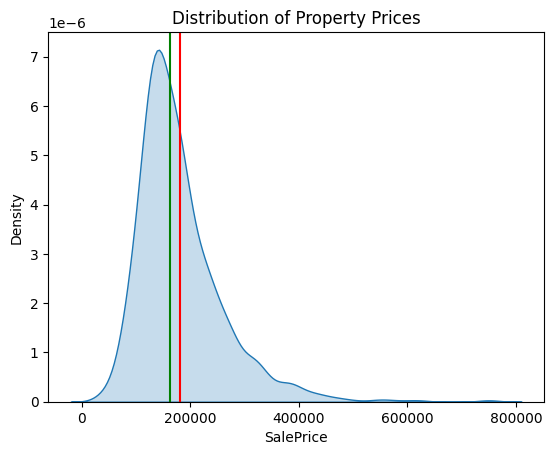

In [380]:
sns.kdeplot(train_data['SalePrice'],fill=True)
plt.axvline(x=market_value_mean, color='r', linestyle='-')
plt.axvline(x=market_value_med, color='g', linestyle='-')
plt.title('Distribution of Property Prices')
plt.show()

The mean property sale price is under 187,000 and the median is even lower. The majority of properties in this dataset are priced closer to the median approx. 170,000

In [381]:
#Are sale prices skewed?
train_data['SalePrice'].skew(axis=0)

1.8828757597682129

In [382]:
sm.stats.stattools.robust_skewness(train_data['SalePrice'])

(1.8809407460340364,
 0.21392442725379351,
 0.3227087342739138,
 0.22566429543722444)

From the kde plot and the kurtosis values, it's fair to say that property sale prices do not contain much skewness, and therefore less outlier-prone distribution.

### Correlation Analysis 

In [383]:
num_cols = train_data.select_dtypes(['float', 'int'])
num_cols.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0  1.0        60.0         65.0   8450.0          7.0          5.0  \
1  2.0        20.0         80.0   9600.0          6.0          8.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   
0       196.0       706.0         0.0      150.0        856.0     856.0  \
1         0.0       978.0         0.0      284.0       1262.0    1262.0   
2       162.0       486.0         0.0      434.0        920.0     920.0   
3         0.0       216.0         0.0      540.0        756.0     961.0   
4       350.0       655.0         0.0      490.0       1145.0    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath   
0     854.0           0.0     1710.0           1.0           0.0       2.0  \
1       0.0           0.0     1262.0           0.0           1.0       2.0   
2     866.0           0.0     1786.0           1.0           0.0       2.0   
3     756.0           0.0     1717.0           1.0           0.0       1.0   
4    1053.0           0.0     2198.0           1.0           0.0       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       1.0           3.0           1.0           8.0         0.0  \
1       0.0           3.0           1.0           6.0         1.0   
2       1.0           3.0           1.0           6.0         1.0   
3       0.0           3.0           1.0           7.0         1.0   
4       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0   
2            0.0        0.0          0.0       0.0      0.0     9.0   
3          272.0        0.0          0.0       0.0      0.0     2.0   
4            0.0        0.0          0.0       0.0      0.0    12.0   

   SalePrice  Year_Built  Month_Built  Day_Built  Year_Remodelled   
0   208500.0        2003            1          1             2003  \
1   181500.0        1976            1          1             1976   
2   223500.0        2001            1          1             2002   
3   140000.0        1915            1          1             1970   
4   250000.0        2000            1          1             2000   

   Month_Remodelled  Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  
0                 1               1       2008           1         1  
1                 1               1       2007           1         1  
2                 1               1       2008           1         1  
3                 1               1       2006           1         1  
4                 1               1       2008           1         1

In [384]:
num_data_skew = num_cols.skew()
num_data_skew

Id                   0.000
MSSubClass           1.408
LotFrontage          2.409
LotArea             12.208
OverallQual          0.217
OverallCond          0.693
MasVnrArea           2.678
BsmtFinSF1           1.686
BsmtFinSF2           4.255
BsmtUnfSF            0.920
TotalBsmtSF          1.524
1stFlrSF             1.377
2ndFlrSF             0.813
LowQualFinSF         9.011
GrLivArea            1.367
BsmtFullBath         0.596
BsmtHalfBath         4.103
FullBath             0.037
HalfBath             0.676
BedroomAbvGr         0.212
KitchenAbvGr         4.488
TotRmsAbvGrd         0.676
Fireplaces           0.650
GarageYrBlt         -0.678
GarageCars          -0.343
GarageArea           0.180
WoodDeckSF           1.541
OpenPorchSF          2.364
EnclosedPorch        3.090
3SsnPorch           10.304
ScreenPorch          4.122
PoolArea            14.828
MiscVal             24.477
MoSold               0.212
SalePrice            1.883
Year_Built          -0.613
Month_Built          0.000
D

In [385]:
cat_cols = train_data.select_dtypes(['object'])
cat_cols.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope   
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl  \
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg  \
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond   
0     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA  \
1     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
2     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
4     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir   
0           No          GLQ          Unf    GasA        Ex          Y  \
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual   
0      SBrkr          Gd        Typ     Attchd          RFn         TA  \
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

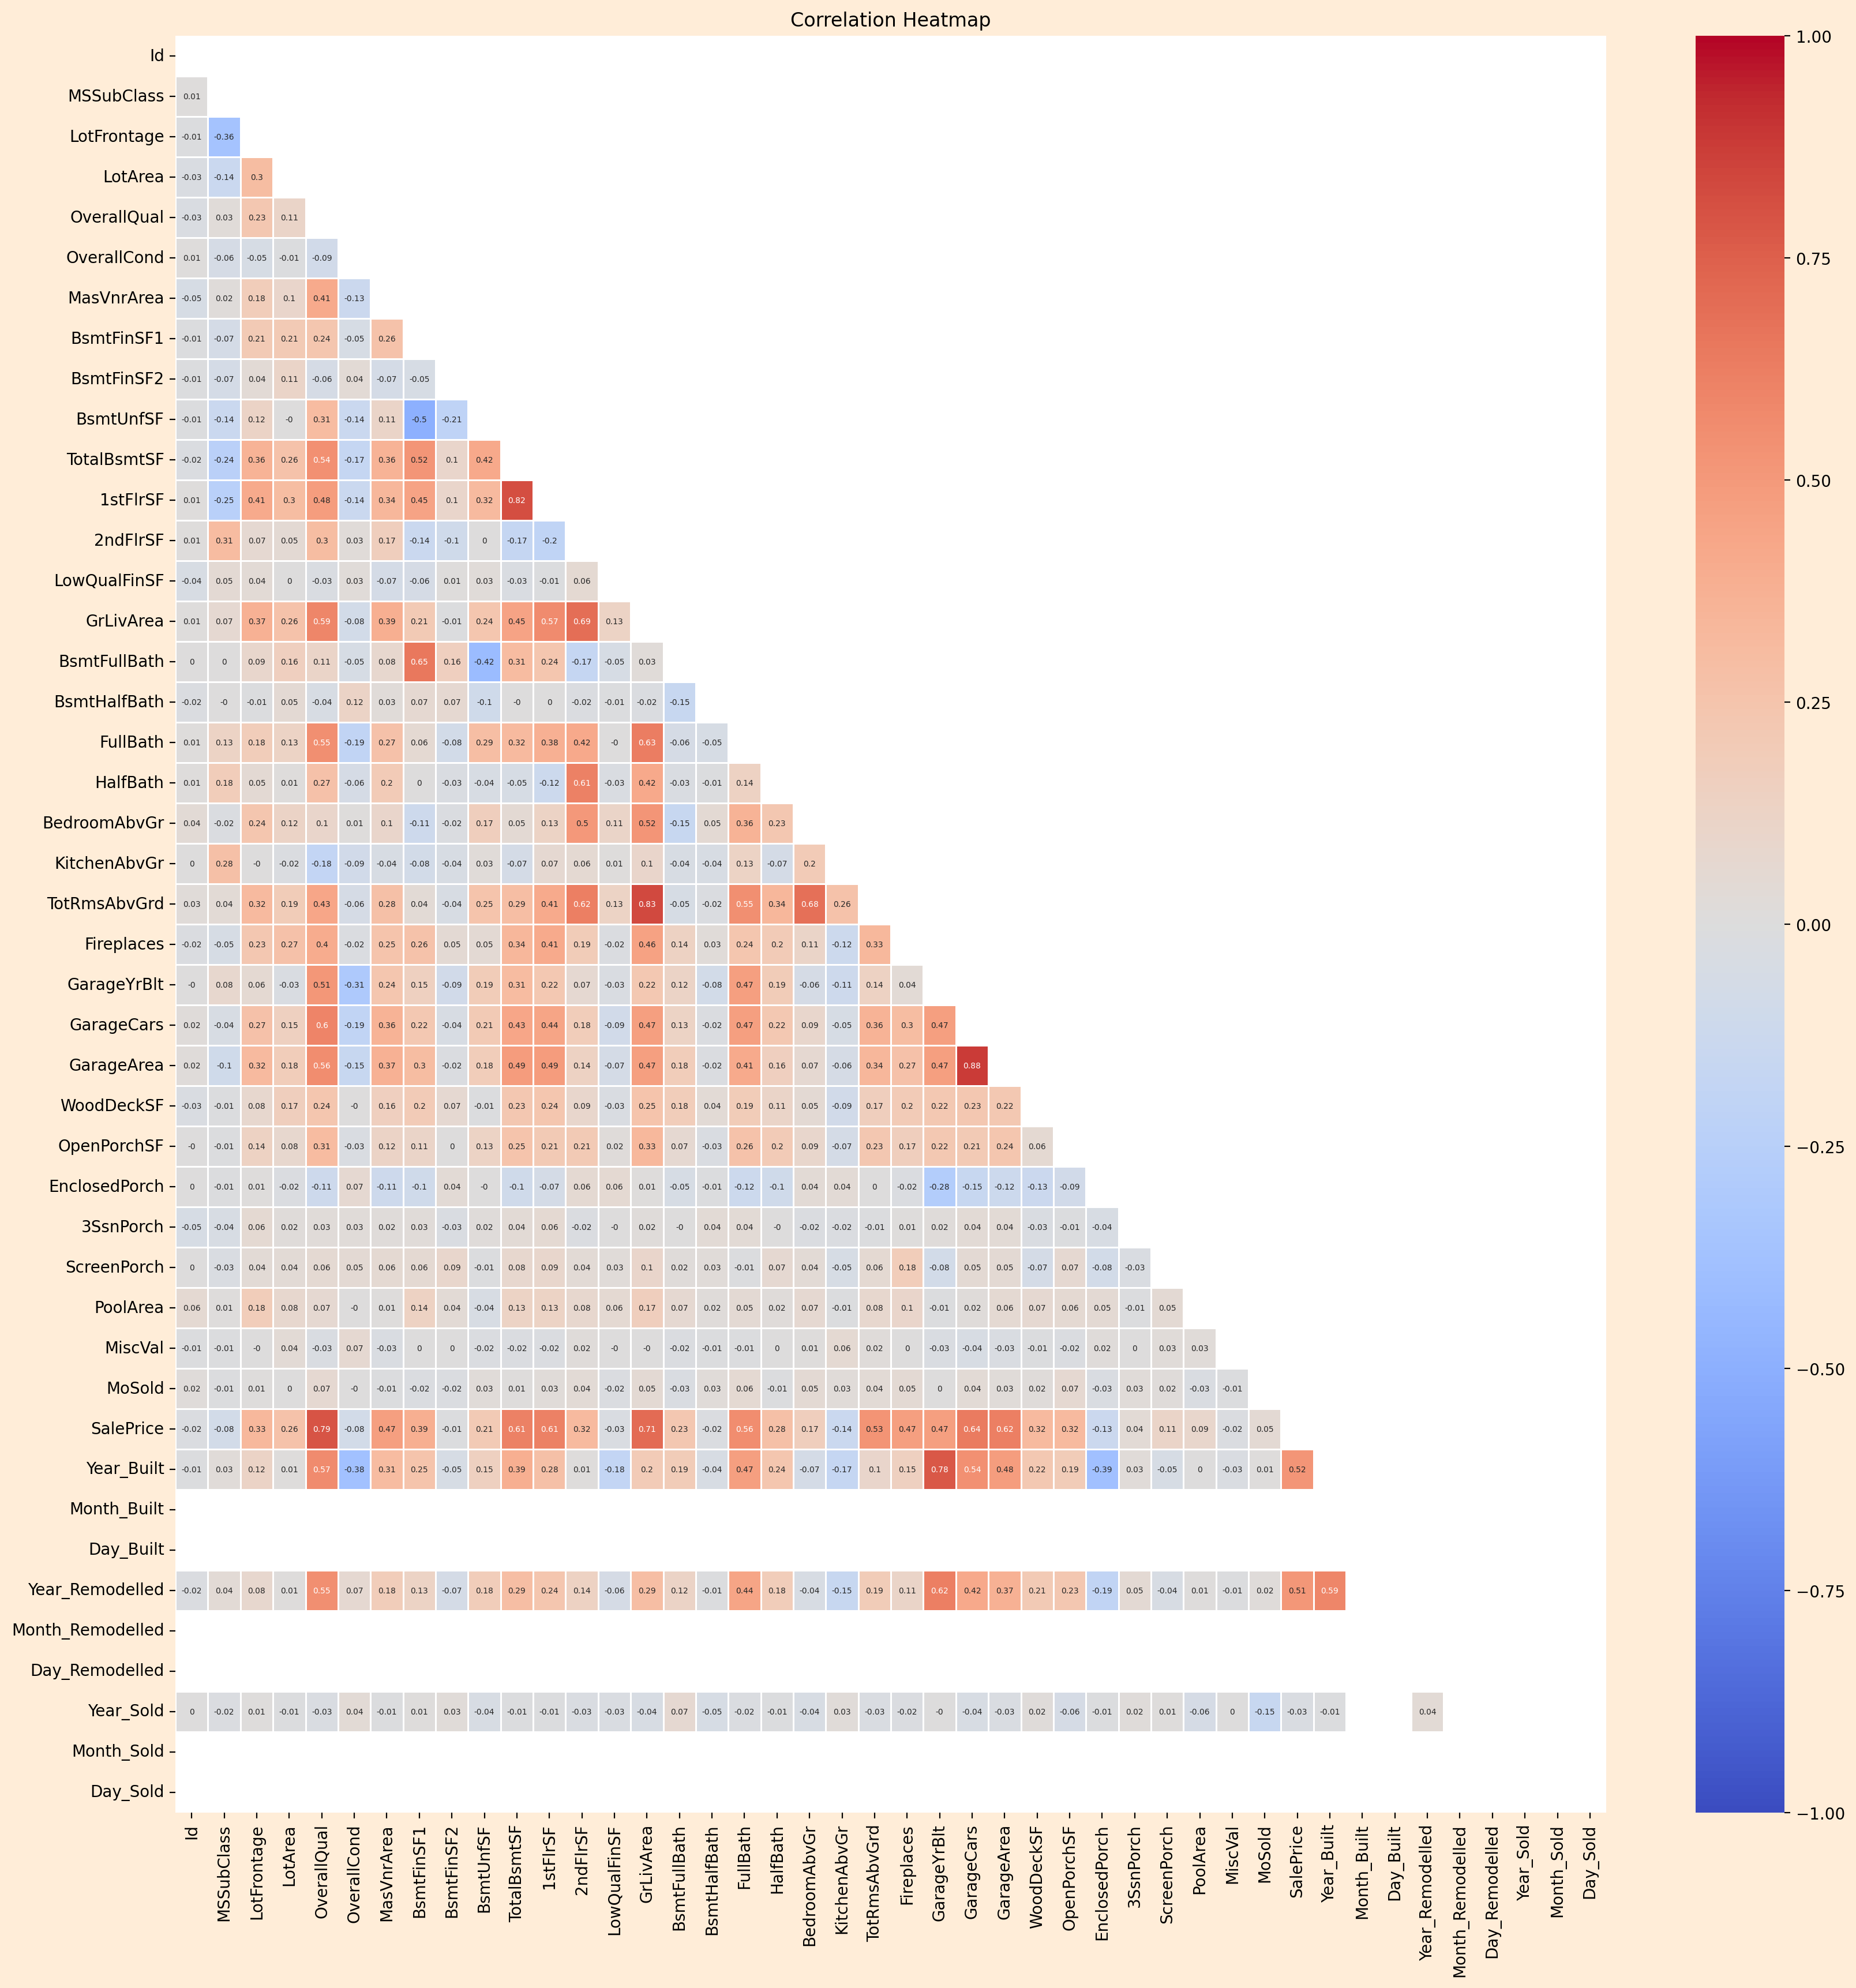

In [386]:
# can we identify any correlations between house sale prices and numeric data? 
fig = plt.figure(figsize=(20,20), facecolor = '#FFEDD8', dpi= 200)
correlation_matrix = num_cols.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, annot_kws={"size": 5}, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

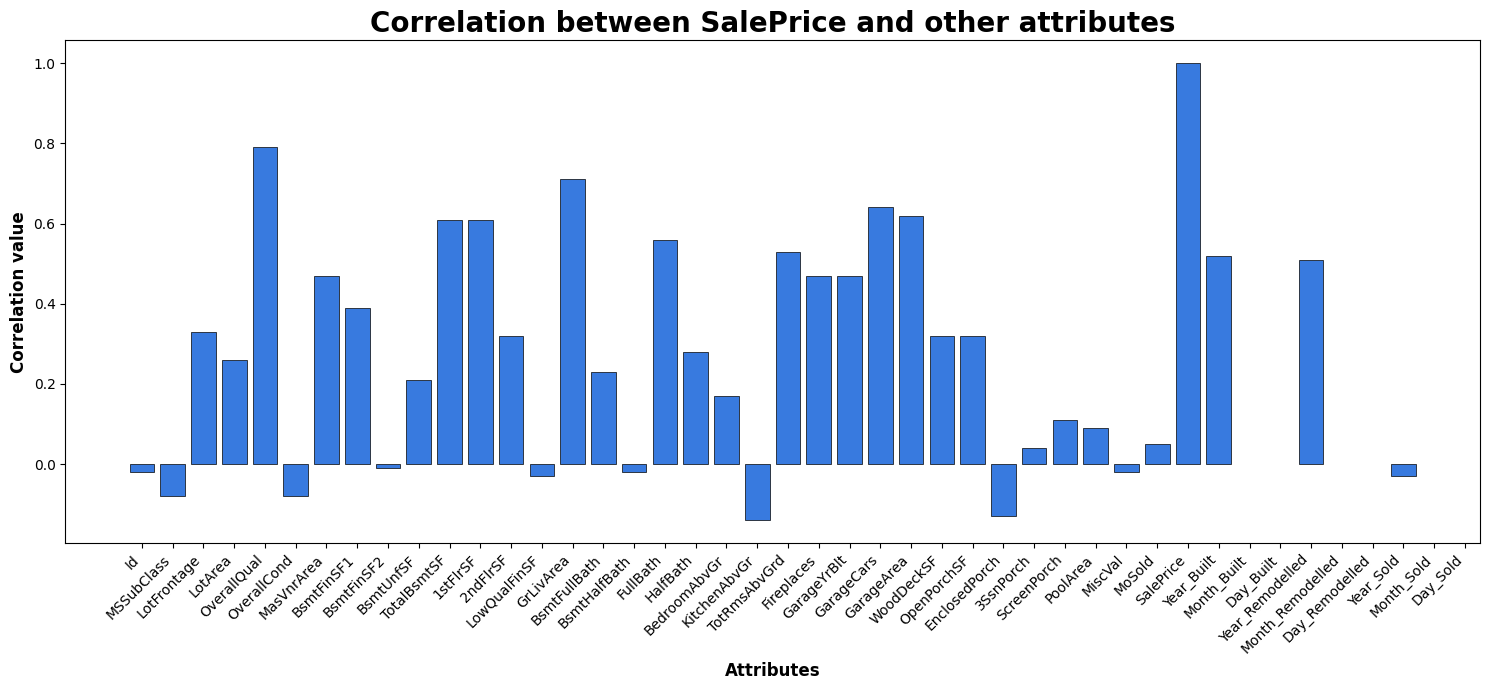

In [387]:
correlation_values = correlation_matrix['SalePrice']
plt.figure(figsize=(15, 7))
plt.bar(correlation_values.index, correlation_values.values, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)
plt.title('Correlation between SalePrice and other attributes', fontsize=20, fontweight = 'bold')
plt.xlabel('Attributes', fontsize=12, fontweight = 'bold')
plt.ylabel('Correlation value', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [388]:
cat_corr = num_cols.corrwith(num_cols['SalePrice'], method='spearman')
golden_features = cat_corr[abs(cat_corr) > 0.4].sort_values(ascending=False)
golden_features = golden_features.drop('SalePrice')
print("There are {} strongly correlated values with SalePrice:\n{}".format(len(golden_features), golden_features))

There are 15 strongly correlated values with SalePrice:
OverallQual        0.810
GrLivArea          0.731
GarageCars         0.691
Year_Built         0.653
GarageArea         0.649
FullBath           0.636
TotalBsmtSF        0.603
1stFlrSF           0.575
Year_Remodelled    0.571
GarageYrBlt        0.563
TotRmsAbvGrd       0.533
Fireplaces         0.519
OpenPorchSF        0.478
LotArea            0.456
MasVnrArea         0.416
dtype: float64


C:\Users\Krupa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



### Univariate Analysis of Key Features

#### Numerical Data

In [389]:
num_data = train_data.select_dtypes(include = ['int', 'float'])
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Year_Built', 'Month_Built', 'Day_Built',
       'Year_Remodelled', 'Month_Remodelled', 'Day_Remodelled', 'Year_Sold',
       'Month_Sold', 'Day_Sold'],
      dtype='object')

In [390]:
num_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0  1.0        60.0         65.0   8450.0          7.0          5.0  \
1  2.0        20.0         80.0   9600.0          6.0          8.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   
0       196.0       706.0         0.0      150.0        856.0     856.0  \
1         0.0       978.0         0.0      284.0       1262.0    1262.0   
2       162.0       486.0         0.0      434.0        920.0     920.0   
3         0.0       216.0         0.0      540.0        756.0     961.0   
4       350.0       655.0         0.0      490.0       1145.0    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath   
0     854.0           0.0     1710.0           1.0           0.0       2.0  \
1       0.0           0.0     1262.0           0.0           1.0       2.0   
2     866.0           0.0     1786.0           1.0           0.0       2.0   
3     756.0           0.0     1717.0           1.0           0.0       1.0   
4    1053.0           0.0     2198.0           1.0           0.0       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       1.0           3.0           1.0           8.0         0.0  \
1       0.0           3.0           1.0           6.0         1.0   
2       1.0           3.0           1.0           6.0         1.0   
3       0.0           3.0           1.0           7.0         1.0   
4       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0   
2            0.0        0.0          0.0       0.0      0.0     9.0   
3          272.0        0.0          0.0       0.0      0.0     2.0   
4            0.0        0.0          0.0       0.0      0.0    12.0   

   SalePrice  Year_Built  Month_Built  Day_Built  Year_Remodelled   
0   208500.0        2003            1          1             2003  \
1   181500.0        1976            1          1             1976   
2   223500.0        2001            1          1             2002   
3   140000.0        1915            1          1             1970   
4   250000.0        2000            1          1             2000   

   Month_Remodelled  Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  
0                 1               1       2008           1         1  
1                 1               1       2007           1         1  
2                 1               1       2008           1         1  
3                 1               1       2006           1         1  
4                 1               1       2008           1         1

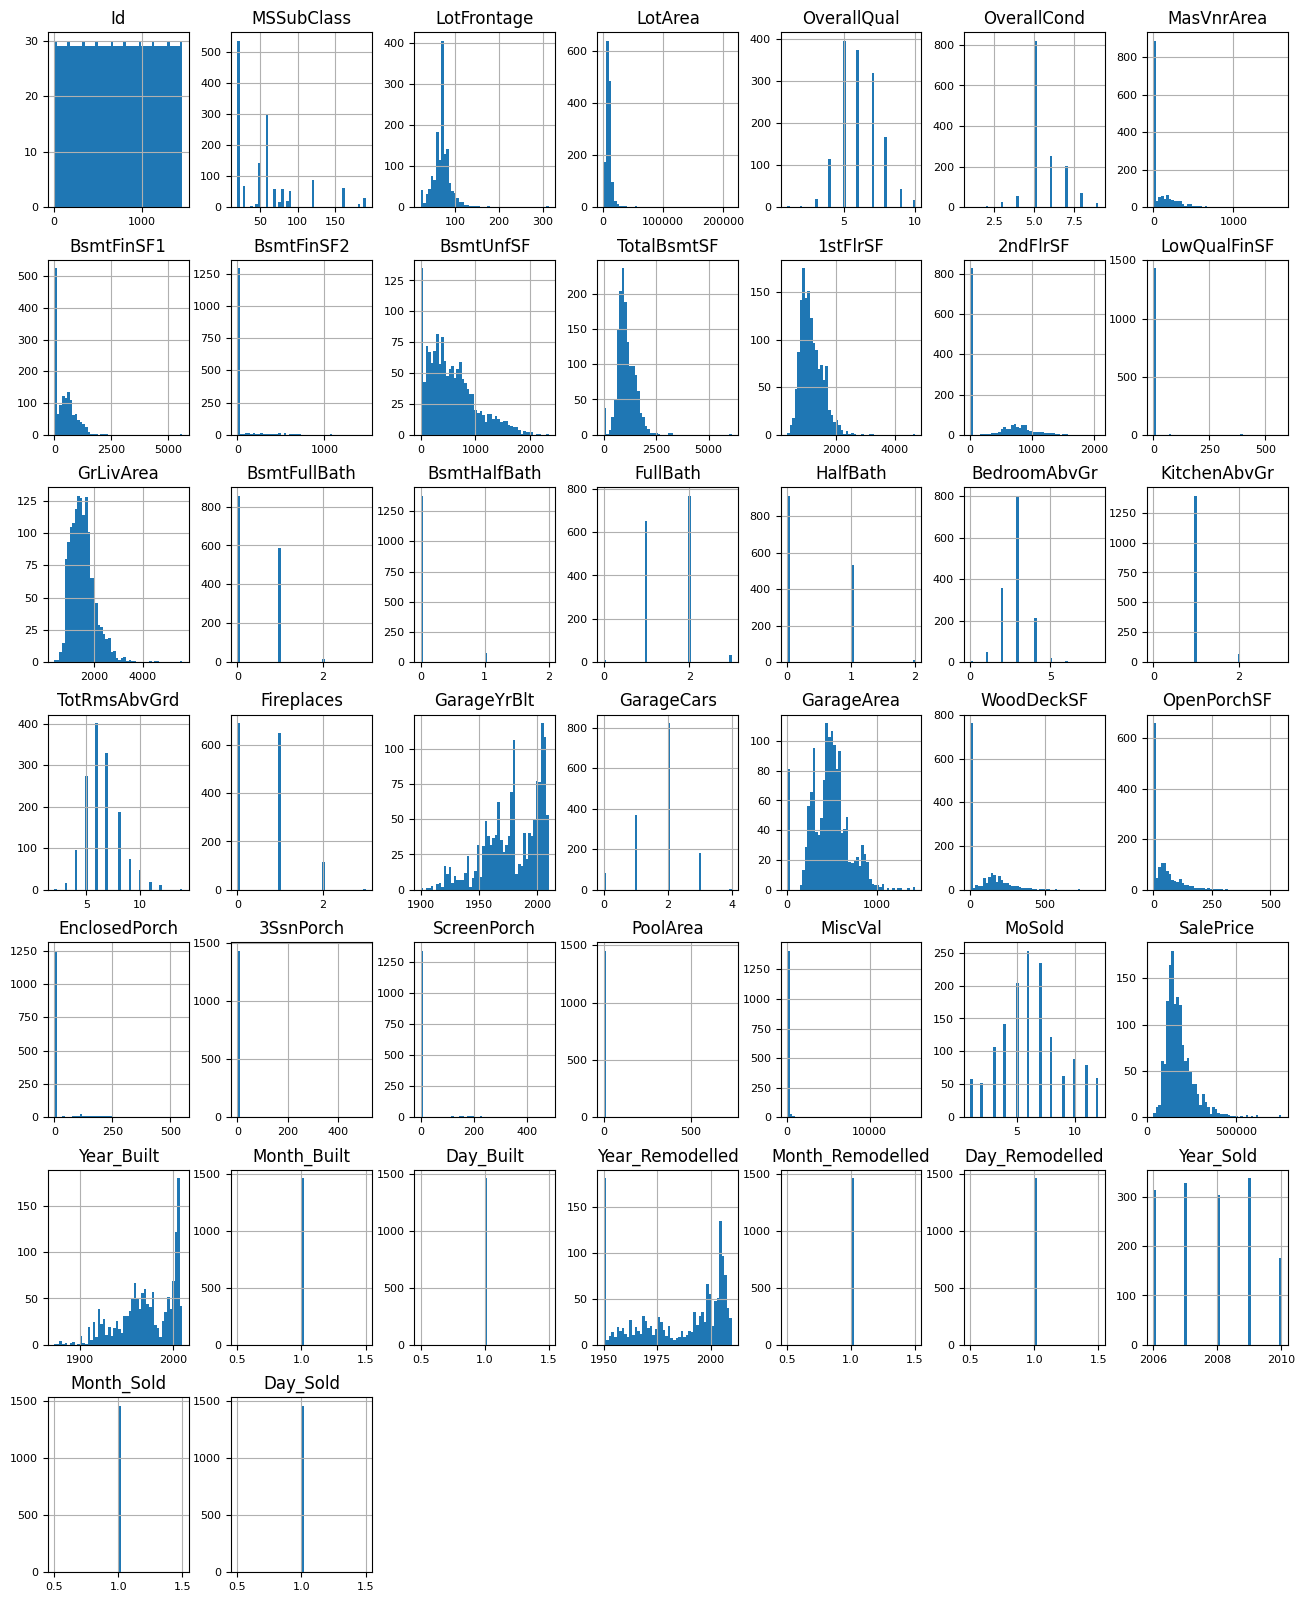

In [391]:
num_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: xlabel='Year_Sold', ylabel='count'>

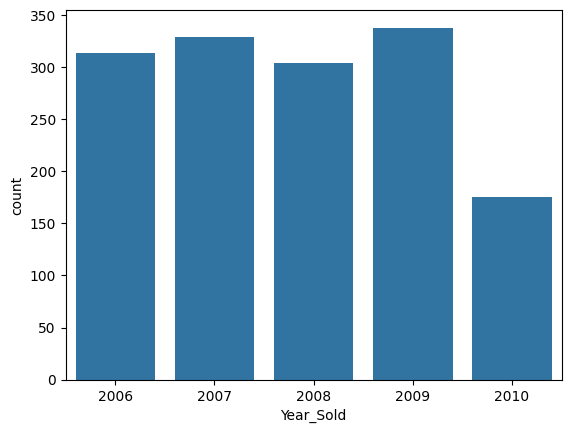

In [392]:
sns.countplot(x='Year_Sold',data=train_data)

<Axes: xlabel='Year_Built', ylabel='Count'>

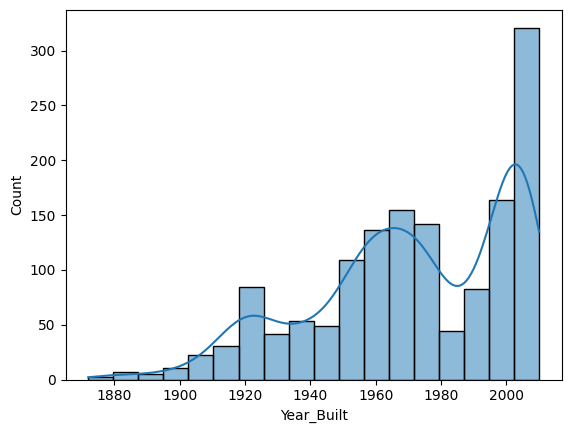

In [393]:
sns.histplot(x='Year_Built',data=train_data, kde=True)

<Axes: xlabel='MoSold', ylabel='count'>

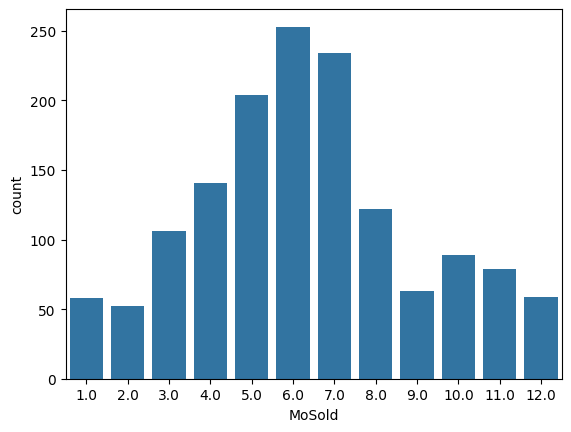

In [394]:
sns.countplot(x='MoSold',data=train_data)

<Axes: xlabel='OverallQual', ylabel='count'>

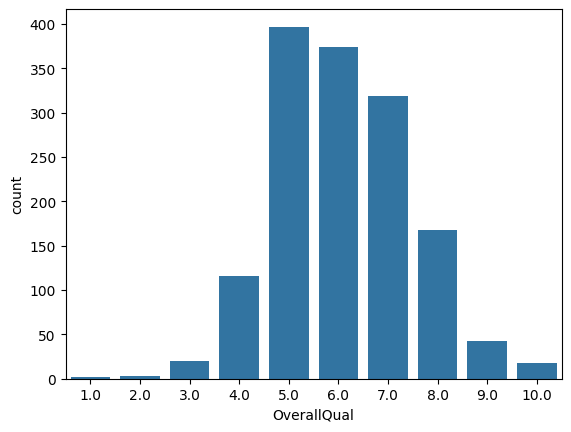

In [395]:
sns.countplot(x='OverallQual',data=train_data)

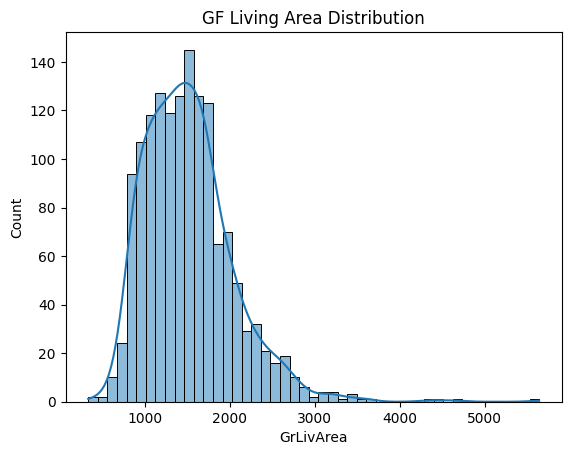

In [396]:
sns.histplot(train_data['GrLivArea'], kde=True)
plt.title('GF Living Area Distribution')
plt.show()

In [397]:
lotarea_mean=train_data['LotArea'].mean()
lotarea_med=train_data['LotArea'].median()

In [398]:
print('Mean:', lotarea_mean.round(2), 'Median:', lotarea_med.round(2))

Mean: 10516.83 Median: 9478.5


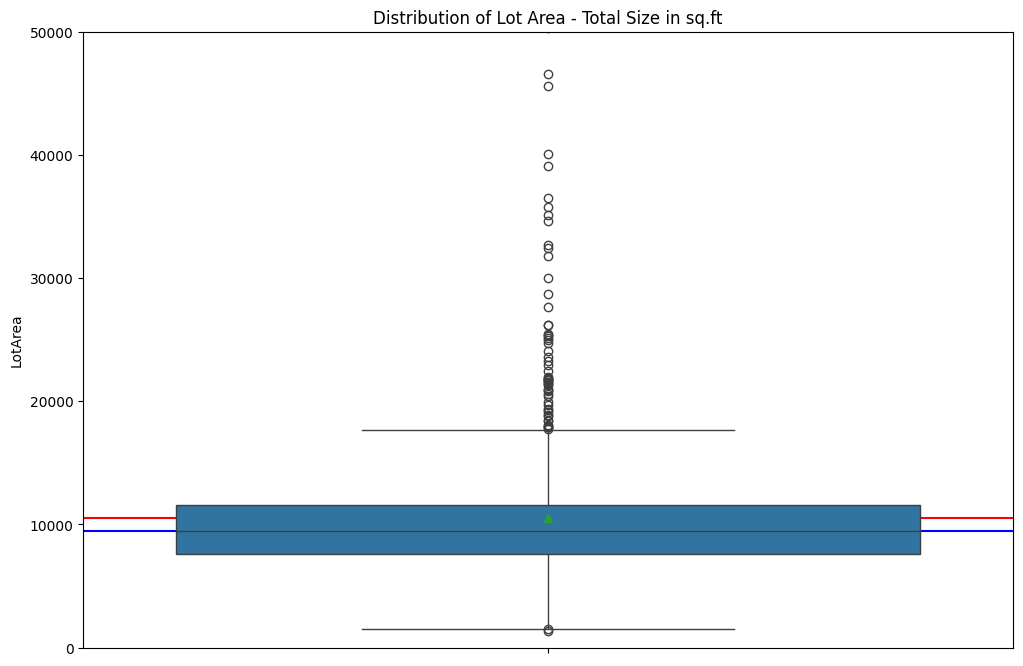

In [399]:
plt.figure(figsize=(12, 8))
plt.axhline(y=lotarea_mean, color='r', linestyle='-')
plt.axhline(y=lotarea_med, color='b', linestyle='-')
sns.boxplot(y='LotArea',data=train_data, showmeans=True)         
plt.ylim(0, 50000)
plt.title('Distribution of Lot Area - Total Size in sq.ft')
plt.show()

#### Summary of Numerical Data Insights

- 2007 was a peak year for property sales, with a slump in sales in 2010 which could be due to the 2008 financial crisis
- Property building has steadily grown over the years, with peaks in the 1920's, 60's and 2000's
- May, June and July are top performing months for property sales 
- Majority of properties scored between 5 and 6 (average - above average) on quality
- Most properties have a living area of 1500 sq.ft at GF level
- The median property area is approx. 10,000 sq.ft
- There seems to be a high number of outliers present in LotArea feature

#### Categorical Data

In [400]:
cat_data = train_data.select_dtypes(['object'])
cat_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope   
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl  \
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg  \
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond   
0     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA  \
1     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
2     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
4     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir   
0           No          GLQ          Unf    GasA        Ex          Y  \
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual   
0      SBrkr          Gd        Typ     Attchd          RFn         TA  \
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

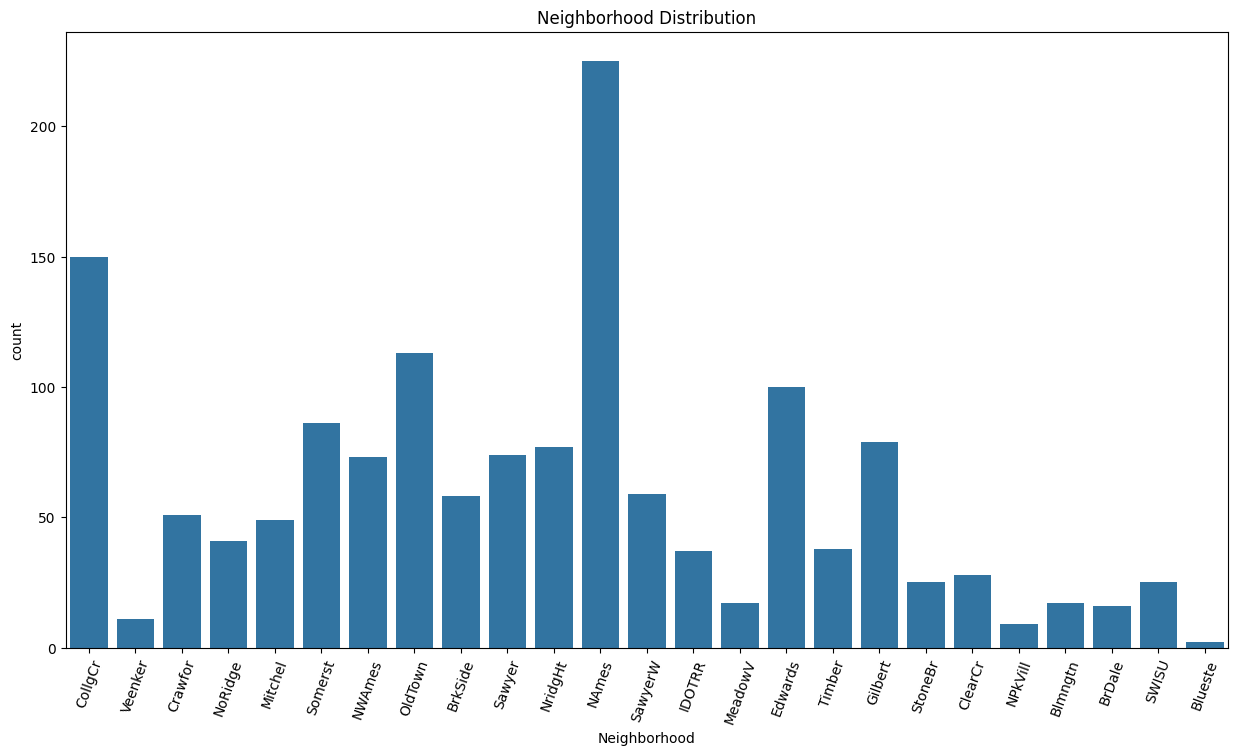

In [401]:
plt.figure(figsize=(15, 8)) 
sns.countplot(x='Neighborhood',data=train_data)
plt.xticks(rotation=70)
plt.title('Neighborhood Distribution')
plt.show()

Text(0.5, 1.0, 'Building Type Distribution')

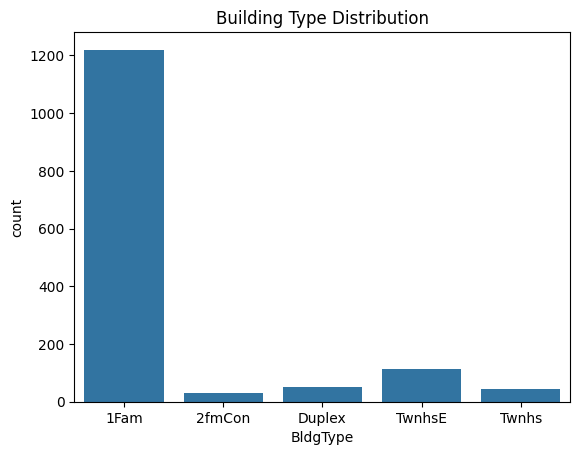

In [402]:
sns.countplot(x='BldgType',data=train_data)
plt.title('Building Type Distribution')

Text(0.5, 1.0, 'Proximity to main road or rail road')

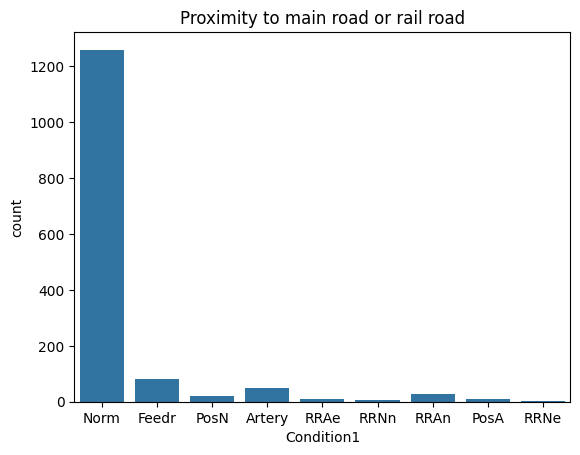

In [403]:
sns.countplot(x='Condition1',data=train_data)
plt.title('Proximity to main road or rail road')

Text(0.5, 1.0, 'Quality of External Material Distribution')

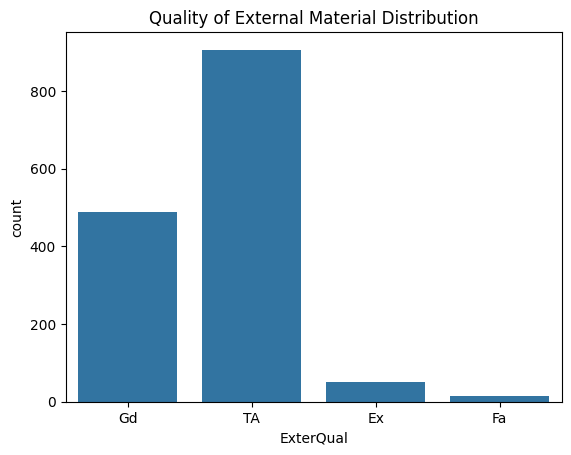

In [404]:
sns.countplot(x='ExterQual',data=train_data)
plt.title('Quality of External Material Distribution')

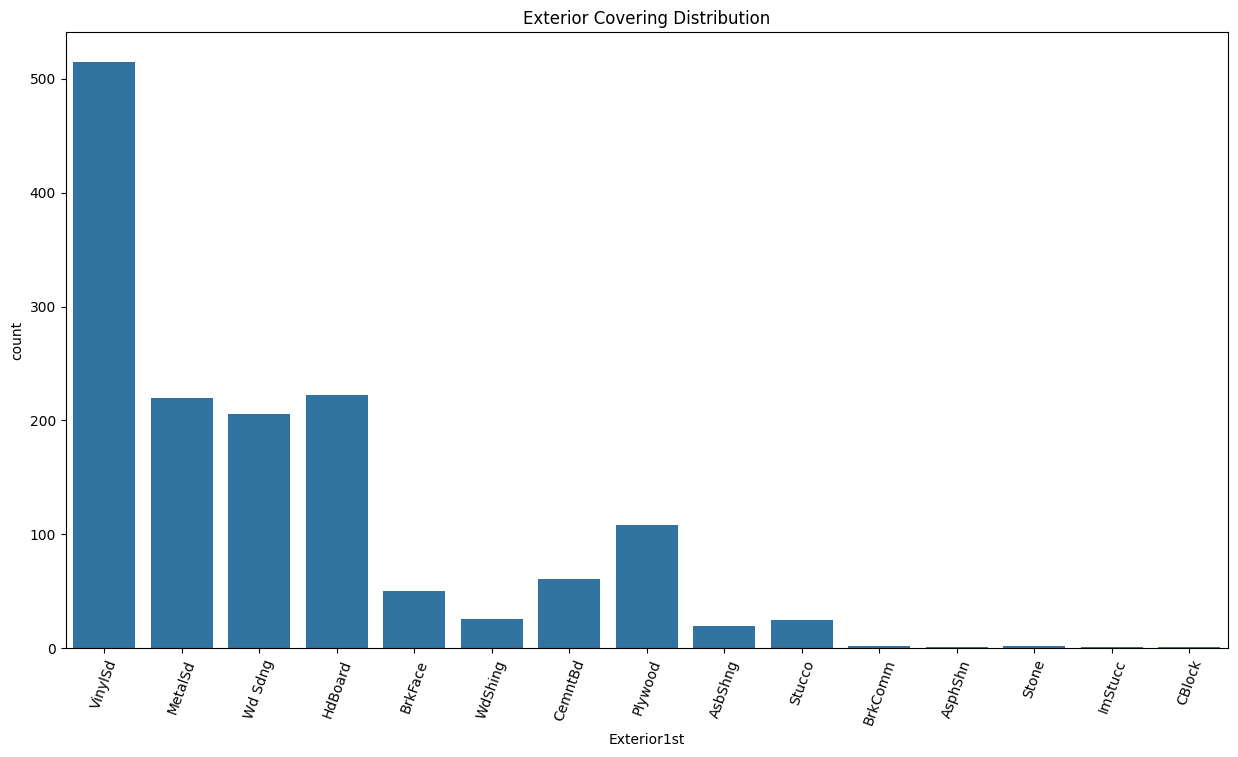

In [405]:
plt.figure(figsize=(15, 8)) 
sns.countplot(x='Exterior1st',data=train_data)
plt.xticks(rotation=70)
plt.title('Exterior Covering Distribution')
plt.show()

Text(0.5, 1.0, 'House Style Distribution')

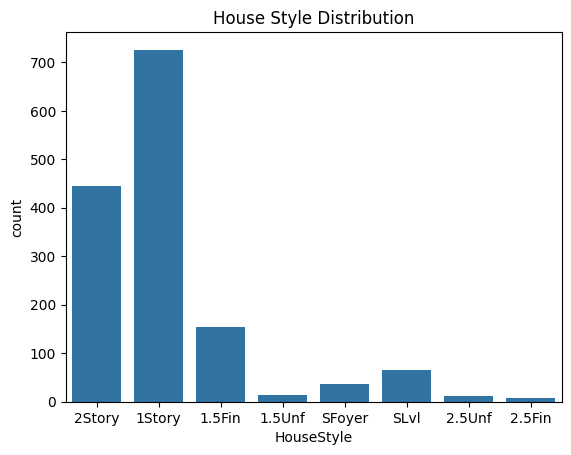

In [406]:
sns.countplot(x='HouseStyle',data=train_data)
plt.title('House Style Distribution')

#### Summary of Categorical Data Insights

- Majority of properties are located in North Ames, followed by College Creek
- Most properties are single-family detached homes
- The majority of properties have a normal proximity to main or rail road
- Majority of properties scored between average - good on external quality
- Most properties are clad in vinyl siding 
- The majority of properties are one to two stories high
- There is skewness present in categorical data, including features such as: house style, exterior material, building type, proximity to rail or road and neighborhood


### Bivariate Analysis

#### Numerical Data

In [407]:
avg_yrsold = train_data.groupby('Year_Sold').SalePrice.mean()
avg_yrsold=avg_yrsold.to_frame().reset_index()
avg_yrsold

Year_Sold   SalePrice
0       2006  182549.459
1       2007  186063.152
2       2008  177360.839
3       2009  179432.104
4       2010  177393.674

In [408]:
px.scatter(avg_yrsold, x='Year_Sold', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship betweeen Year Sold & Property Sale Price')

In [409]:
avg_yrbuilt = train_data.groupby('Year_Built').SalePrice.mean()
avg_yrbuilt=avg_yrbuilt.to_frame().reset_index()
avg_yrbuilt

Year_Built   SalePrice
0          1872  122000.000
1          1875   94000.000
2          1880  200619.750
3          1882  168000.000
4          1885  111250.000
5          1890  142200.000
6          1892  291250.000
7          1893  325000.000
8          1898  106000.000
9          1900  112492.600
10         1904  157500.000
11         1905  163000.000
12         1906  135000.000
13         1908  183500.000
14         1910  111959.059
15         1911  130000.000
16         1912  119466.667
17         1913   90350.000
18         1914  126055.286
19         1915  134387.500
20         1916  139800.000
21         1917  129500.000
22         1918  172421.429
23         1919  154833.333
24         1920  112903.333
25         1921  140813.333
26         1922  109237.500
27         1923  159428.571
28         1924  105985.714
29         1925  129190.625
30         1926  124144.444
31         1927   82666.667
32         1928  135557.143
33         1929  153000.000
34         1930  103588.889
35         1931  126650.000
36         1932  233358.500
37         1934  220766.667
38         1935  161083.333
39         1936  137888.889
40         1937  131974.200
41         1938  109137.500
42         1939  150825.000
43         1940  131994.444
44         1941  120900.000
45         1942  162000.000
46         1945  133500.000
47         1946  122400.000
48         1947  117200.000
49         1948  137764.286
50         1949  111517.583
51         1950  128036.250
52         1951  136600.000
53         1952  110398.600
54         1953  146333.333
55         1954  139650.000
56         1955  134517.188
57         1956  135810.714
58         1957  149959.100
59         1958  143179.167
60         1959  154124.308
61         1960  161550.000
62         1961  139846.429
63         1962  145742.105
64         1963  143403.125
65         1964  161893.333
66         1965  153115.958
67         1966  159559.444
68         1967  142337.500
69         1968  166075.000
70         1969  160725.643
71         1970  134647.917
72         1971  131820.455
73         1972  140569.565
74         1973  139400.000
75         1974  183050.000
76         1975  159268.750
77         1976  163831.970
78         1977  166860.938
79         1978  160962.500
80         1979  156396.889
81         1980  164800.000
82         1981  249880.000
83         1982  132400.000
84         1983  181400.000
85         1984  164111.111
86         1985  191400.000
87         1986  212000.000
88         1987  198000.000
89         1988  204636.364
90         1989  279500.000
91         1990  220881.667
92         1991  186140.000
93         1992  218384.615
94         1993  218058.824
95         1994  247900.000
96         1995  262194.444
97         1996  259162.667
98         1997  214925.000
99         1998  220450.000
100        1999  210614.720
101        2000  210766.667
102        2001  242630.000
103        2002  226869.565
104        2003  227408.578
105        2004  210347.722
106        2005  229680.953
107        2006  251775.448
108        2007  255362.735
109        2008  348849.130
110        2009  269220.000
111        2010  394432.000

In [410]:
px.scatter(avg_yrbuilt, x='Year_Built', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship betweeen Year Built & Property Sale Price')

In [411]:
avg_mosold = train_data.groupby('MoSold').SalePrice.mean()
avg_mosold=avg_mosold.to_frame().reset_index()
avg_mosold

MoSold   SalePrice
0      1.0  183256.259
1      2.0  177882.000
2      3.0  183253.925
3      4.0  171503.262
4      5.0  172307.270
5      6.0  177395.735
6      7.0  186331.192
7      8.0  184651.828
8      9.0  195683.206
9     10.0  179563.978
10    11.0  192210.911
11    12.0  186518.966

In [412]:
px.scatter(avg_mosold, x='MoSold', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship betweeen Month Sold & Property Sale Price')

In [413]:
avg_qual_score = train_data.groupby('OverallQual').SalePrice.mean()
avg_qual_score=avg_qual_score.to_frame().reset_index()
avg_qual_score

OverallQual   SalePrice
0          1.0   50150.000
1          2.0   51770.333
2          3.0   87473.750
3          4.0  108420.655
4          5.0  133523.348
5          6.0  161603.035
6          7.0  207716.423
7          8.0  274735.536
8          9.0  367513.023
9         10.0  438588.389

In [414]:
px.scatter(avg_qual_score, x='OverallQual', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship betweeen Average Quality Score & Property Sale Price')

In [415]:
px.scatter(train_data, x ='YearBuilt', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship between Year property build and Sale Price')

In [416]:
px.scatter(train_data, x='GrLivArea', y='SalePrice', trendline='ols', trendline_color_override='red', title='GF Living Area & Property Sale Price')

In [417]:
px.scatter(train_data, x ='LotArea', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship between Lot Area and Sale Price')

In [418]:
avg_gararea = train_data.groupby('GarageArea').SalePrice.mean()
avg_gararea=avg_gararea.to_frame().reset_index()
avg_gararea

GarageArea   SalePrice
0           0.0  103317.284
1         160.0   89000.000
2         164.0  155000.000
3         180.0  156876.333
4         186.0  154900.000
5         189.0   78000.000
6         192.0  121000.000
7         198.0  119500.000
8         200.0   79125.000
9         205.0  108166.667
10        208.0  120000.000
11        210.0  104333.333
12        213.0  177500.000
13        216.0  133792.000
14        220.0  106391.667
15        225.0  146500.000
16        228.0  161000.000
17        230.0  225000.000
18        234.0  143750.000
19        240.0  133507.237
20        244.0  132000.000
21        246.0   84500.000
22        248.0  111000.000
23        250.0   93333.333
24        252.0  159900.000
25        254.0  135000.000
26        255.0  117000.000
27        256.0  126500.000
28        260.0  133800.000
29        261.0  118500.000
30        264.0  120262.500
31        270.0  132100.000
32        271.0  144675.000
33        273.0   95650.000
34        275.0  127166.667
35        276.0  133250.000
36        280.0  112184.375
37        281.0  132778.000
38        282.0  193000.000
39        283.0  135750.000
40        284.0  135000.000
41        286.0  104344.444
42        287.0   72500.000
43        288.0  125270.370
44        290.0   84000.000
45        292.0  145250.000
46        294.0  118125.000
47        296.0  136500.000
48        297.0  126100.000
49        299.0  145110.000
50        300.0  129700.000
51        301.0  154700.000
52        303.0  190000.000
53        304.0  151750.000
54        305.0  137800.000
55        306.0  124000.000
56        308.0  120848.050
57        309.0  158000.000
58        312.0  146233.333
59        315.0  143500.000
60        318.0  143000.000
61        319.0  207500.000
62        320.0  163000.000
63        322.0  134000.000
64        324.0  143000.000
65        325.0  136900.000
66        326.0  112740.000
67        327.0  106500.000
68        328.0  149900.000
69        330.0   97500.000
70        336.0  130125.000
71        338.0  114680.000
72        342.0  177000.000
73        343.0  174000.000
74        349.0  194150.000
75        350.0   60000.000
76        352.0  121729.833
77        354.0  165000.000
78        358.0  171000.000
79        360.0  137343.909
80        364.0  147500.000
81        366.0   83000.000
82        367.0  133000.000
83        368.0  120700.000
84        370.0  207000.000
85        372.0  192140.000
86        373.0  168000.000
87        375.0  157000.000
88        377.0  165500.000
89        379.0  107400.000
90        380.0  177433.333
91        384.0  124927.889
92        386.0  127000.000
93        388.0  173631.667
94        389.0  227500.000
95        390.0  197665.000
96        392.0  125433.333
97        393.0  180700.000
98        396.0  144089.000
99        397.0  165196.667
100       398.0  161246.667
101       400.0  155089.880
102       402.0  166250.000
103       403.0  179000.000
104       404.0  127000.000
105       405.0  153500.000
106       406.0  175000.000
107       408.0  109900.000
108       409.0  191000.000
109       410.0  142621.333
110       412.0  162000.000
111       413.0  185000.000
112       414.0  116000.000
113       416.0  198250.000
114       418.0  168500.000
115       420.0  148921.053
116       422.0  239362.500
117       423.0  160000.000
118       424.0  168000.000
119       425.0  213000.000
120       426.0  179665.000
121       427.0  185000.000
122       429.0  173428.333
123       430.0  199875.000
124       431.0  215060.000
125       432.0  165831.500
126       433.0  194000.000
127       434.0  206380.000
128       435.0  181000.000
129       436.0  152242.500
130       437.0  191000.000
131       438.0  198580.000
132       439.0  199250.000
133       440.0  157078.531
134       441.0  184250.000
135       442.0  167100.000
136       444.0  187500.000
137       445.0  190000.000
138       447.0  149975.000
139       450.0  144200.000
140       451.0  177600.000
141       452.0  144533.333
1

In [419]:
px.scatter(avg_gararea, x ='GarageArea', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship between Garage Area and Sale Price')

In [420]:
bmnt_area = train_data.groupby('TotalBsmtSF').SalePrice.mean()
bmnt_area=bmnt_area.to_frame().reset_index()
bmnt_area

TotalBsmtSF   SalePrice
0            0.0  105652.892
1          105.0  116000.000
2          190.0   91300.000
3          264.0  102333.333
4          270.0   52000.000
5          290.0   60000.000
6          319.0   89500.000
7          360.0  140000.000
8          372.0  139000.000
9          384.0  162842.857
10         408.0  184100.000
11         420.0   82500.000
12         440.0   95283.333
13         458.0   83000.000
14         462.0   91000.000
15         480.0   35311.000
16         482.0  163000.000
17         483.0   96628.571
18         485.0  117000.000
19         504.0  127000.000
20         506.0  151000.000
21         520.0  109333.333
22         525.0   88000.000
23         528.0  136500.000
24         530.0  101000.000
25         533.0  140000.000
26         536.0   85000.000
27         539.0  197000.000
28         540.0   67496.500
29         544.0   79000.000
30         546.0   85875.000
31         547.0  144333.333
32         551.0  148800.000
33         559.0  164000.000
34         560.0  124000.000
35         561.0  124000.000
36         570.0  170000.000
37         572.0   97950.000
38         576.0  118250.000
39         585.0  210000.000
40         588.0  159250.000
41         596.0  117500.000
42         600.0  124478.857
43         602.0  165000.000
44         608.0  123000.000
45         611.0  128000.000
46         612.0  175744.333
47         616.0  135233.000
48         617.0  112000.000
49         622.0  125500.000
50         624.0  101950.000
51         625.0  168300.000
52         626.0  120000.000
53         630.0   92944.444
54         636.0  124000.000
55         637.0  123700.000
56         641.0  100000.000
57         644.0  127500.000
58         648.0  130500.000
59         649.0   80000.000
60         650.0  157166.667
61         651.0  135000.000
62         654.0  179665.000
63         655.0  159500.000
64         656.0   64500.000
65         658.0   81000.000
66         660.0  148875.000
67         661.0  139000.000
68         662.0   90000.000
69         663.0  158000.000
70         672.0  117905.882
71         673.0  165000.000
72         676.0   66500.000
73         680.0  129000.000
74         683.0   61000.000
75         684.0  129500.800
76         686.0  126500.000
77         689.0  156687.500
78         690.0  159500.000
79         691.0  152466.667
80         693.0   52500.000
81         696.0  155000.000
82         697.0  220285.000
83         698.0  118718.750
84         700.0  181250.000
85         702.0  158000.000
86         704.0  174500.000
87         707.0  178000.000
88         708.0  179900.000
89         709.0  110000.000
90         710.0  242000.000
91         712.0  194500.000
92         713.0  179900.000
93         714.0  136000.000
94         715.0  132866.667
95         716.0  169750.000
96         718.0  159500.000
97         720.0  115700.000
98         721.0   82000.000
99         723.0  147500.000
100        725.0  157250.000
101        727.0  154000.000
102        728.0  178887.500
103        729.0  174500.000
104        731.0  164950.000
105        732.0  152430.000
106        735.0  120625.000
107        736.0  113000.000
108        738.0  173500.000
109        740.0  166750.000
110        741.0  178000.000
111        742.0  127166.667
112        744.0  152200.000
113        746.0  165400.000
114        747.0  125121.750
115        750.0  181950.000
116        755.0  106000.000
117        756.0  164522.222
118        757.0  127000.000
119        761.0  175900.000
120        764.0  170750.000
121        765.0  123750.000
122        768.0  130241.667
123        770.0  191450.000
124        771.0  177500.000
125        773.0  149000.000
126        774.0  269500.000
127        776.0  161500.000
128        777.0  168750.000
129        778.0  139500.000
130        780.0  137109.091
131        783.0  180700.000
132        784.0  115600.000
133        788.0  134333.333
134        789.0  115000.000
135        791.0  215000.000
136        792.0  230000.000
137

In [421]:
px.scatter(bmnt_area, x ='TotalBsmtSF', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship between Basement Area and Sale Price')

#### Summary of Numerical Bivariate Data Insights

- The following key features have a positive impact on property prices:-
    - overall quality score 
    - GF living area sq.ft
    - Lot Area sq.ft
    
- There is some correlation between the month sold and year built with sale price

- There is a negative correlation between the year sold and sale price. 
- The scatter plots reinforce what we know from the correlation analysis, that basement and garage areas have a positive impact on sale prices.

#### Bivariate Analysis - Categorical Data 

In [422]:
mkt_value_mean=train_data['SalePrice'].mean()
mkt_value_med=train_data['SalePrice'].median()

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\3624683955.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Correlation between Quality Score and Neighborhood')

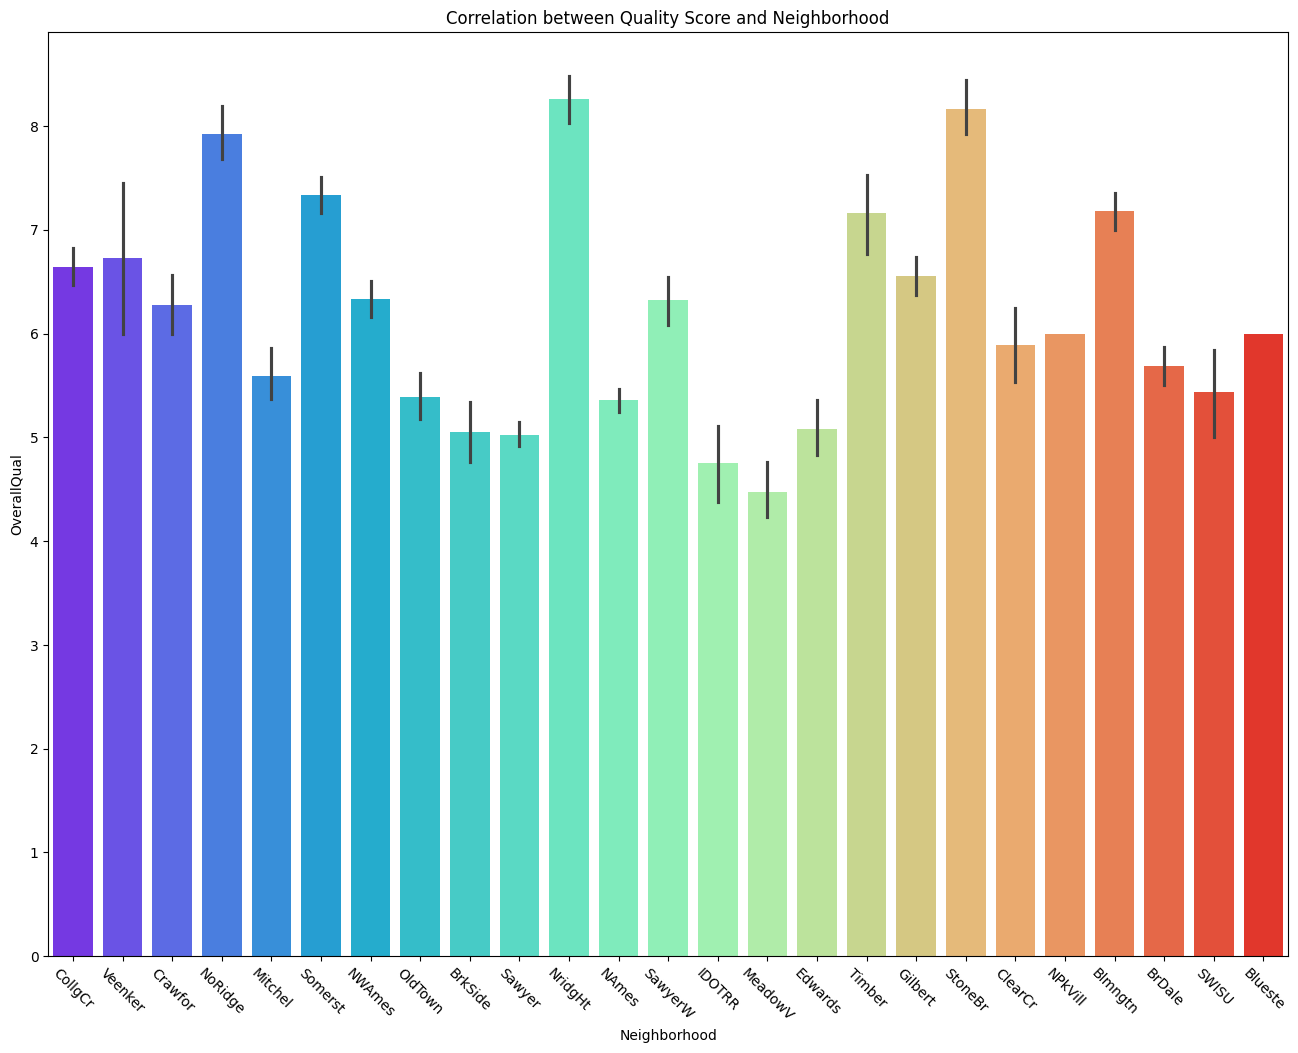

In [423]:
#is there any correlation between overall quality of property and neighborhood? 
plt.figure(figsize=(16,12))
sns.barplot(x='Neighborhood',y='OverallQual',data=train_data, palette='rainbow', legend=False)
plt.xticks(rotation=-45)
#plt.axhline(y=mkt_value_mean, color='r', linestyle='-')
#plt.axhline(y=mkt_value_med, color='g', linestyle='-')
plt.title("Correlation between Quality Score and Neighborhood")

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\4149021131.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Relationship between Neighborhood and Sale Price')

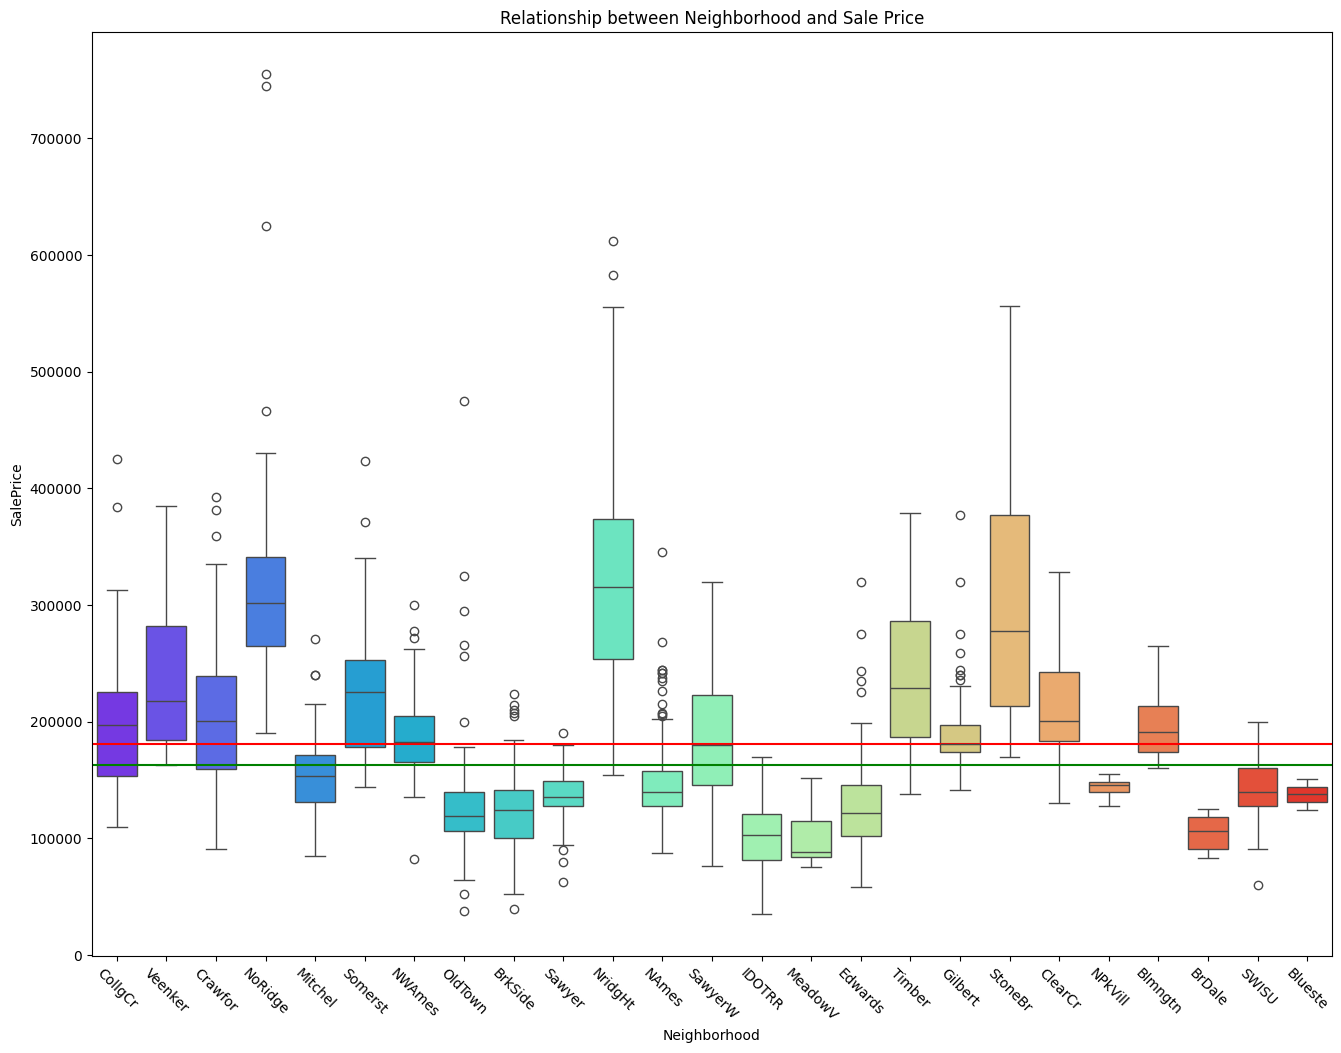

In [424]:
# how does the neighborhood affect sale price?
plt.figure(figsize=(16,12))
sns.boxplot(x='Neighborhood',y='SalePrice',data=train_data, palette='rainbow', legend=False)
plt.xticks(rotation=-45)
plt.axhline(y=mkt_value_mean, color='r', linestyle='-')
plt.axhline(y=mkt_value_med, color='g', linestyle='-')
plt.title("Relationship between Neighborhood and Sale Price")

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\3724383835.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Property Sale Price in relation to Building Type')

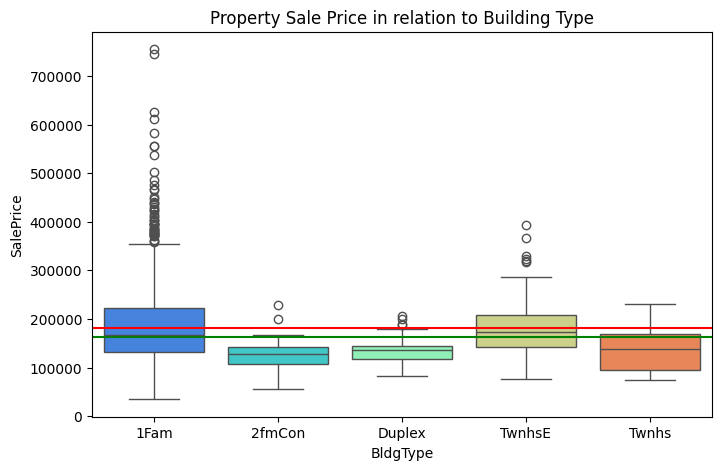

In [425]:
plt.figure(figsize=(8,5))
sns.boxplot(x='BldgType', y='SalePrice', data=train_data, palette='rainbow', legend=False)
plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')
plt.title('Property Sale Price in relation to Building Type')

Text(0.5, 1.0, 'Property Sale Price in relation to Proximity to Rail or Road links')

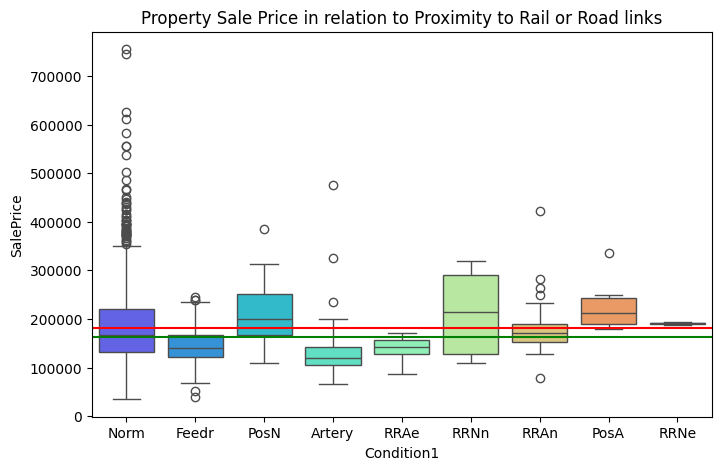

In [426]:
# proximity to rail or road and price 
plt.figure(figsize=(8,5))
sns.boxplot(x='Condition1', y='SalePrice', data=train_data, palette='rainbow', hue='Condition1', legend=False)
plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')
plt.title('Property Sale Price in relation to Proximity to Rail or Road links')

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\1118471372.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Property Sale Price by Exterior Quality Rating')

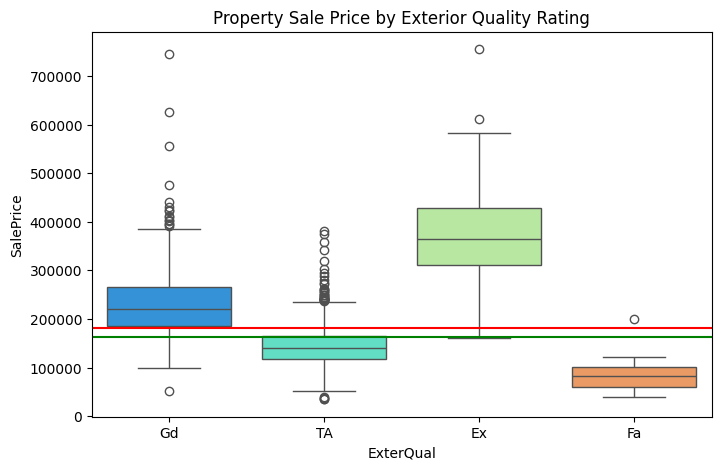

In [427]:
# sale price by exterior condition

plt.figure(figsize=(8,5))
sns.boxplot(x='ExterQual', y='SalePrice', data=train_data, palette='rainbow', legend=False)
plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')
plt.title('Property Sale Price by Exterior Quality Rating')

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\1150197370.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Property Sale Price by External cladding')

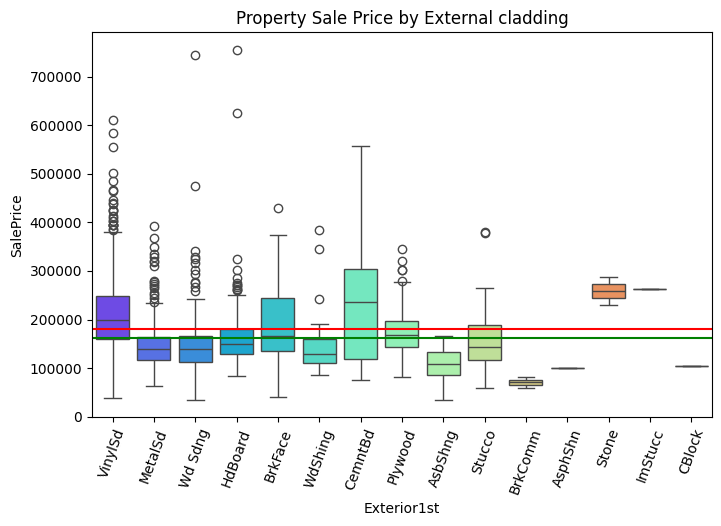

In [428]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exterior1st', y='SalePrice', data=train_data, palette='rainbow')
plt.axhline(y=mkt_value_mean, color='r', linestyle='-')
plt.axhline(y=mkt_value_med, color='g', linestyle='-')
plt.xticks(rotation=70)
plt.title("Property Sale Price by External cladding")

C:\Users\Krupa\AppData\Local\Temp\ipykernel_17652\2757072358.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Property Sale Price by House Style')

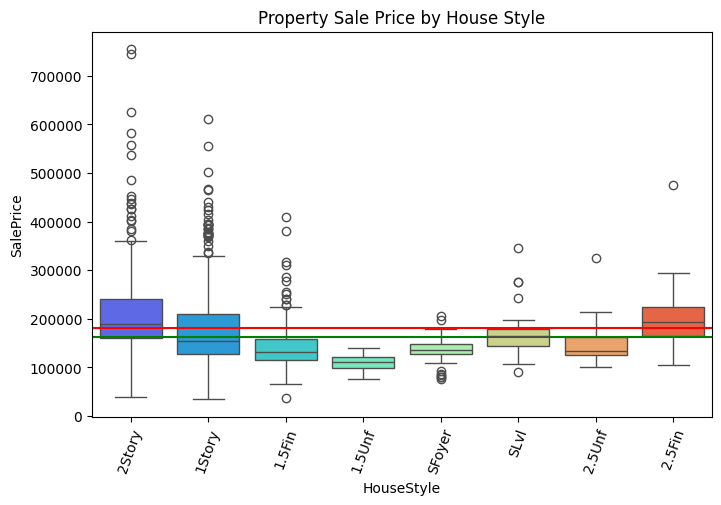

In [429]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HouseStyle', y='SalePrice', data=train_data, palette='rainbow')
plt.axhline(y=mkt_value_mean, color='r', linestyle='-')
plt.axhline(y=mkt_value_med, color='g', linestyle='-')
plt.xticks(rotation=70)
plt.title("Property Sale Price by House Style")

#### Summary of Categorical Bivariate Data Insights

- Properties located in Northridhe Heights, Stone Brook and Northidge achieve higher sale prices
- Properties within close proximity to the East-West railroad and positive off-site features such as parks and greenbelt areas achieve much higher sale prices.
- As to be expected, properties rated excellent on external quality tend to be higher in price
- Cement board and vinyl siding achieve well above average sale prices, whereas asbestos shingles tend to achieve much lower prices. This is likely due to their health related problems.
- 1 storey properties have a large price distribution
- 2 to 2.5 storey properties achieve higher sale prices

### Feature Engineering

#### Create New Features



In [430]:
# is there any corr between age of proprty and sold price? 
train_data['PropAge'] = (train_data['YrSold'].dt.year -train_data['YearBuilt'].dt.year)

In [431]:
train_data['PropAge'].describe()

count    1460.000
mean       36.548
std        30.250
min         0.000
25%         8.000
50%        35.000
75%        54.000
max       136.000
Name: PropAge, dtype: float64

In [432]:
px.scatter(train_data, x ='PropAge', y='SalePrice', trendline='ols', trendline_color_override='red', title='Relationship between Property Age and Sale Price')

There is a negative correlation between property price and sale price. The older the property, the lower the sale price. 

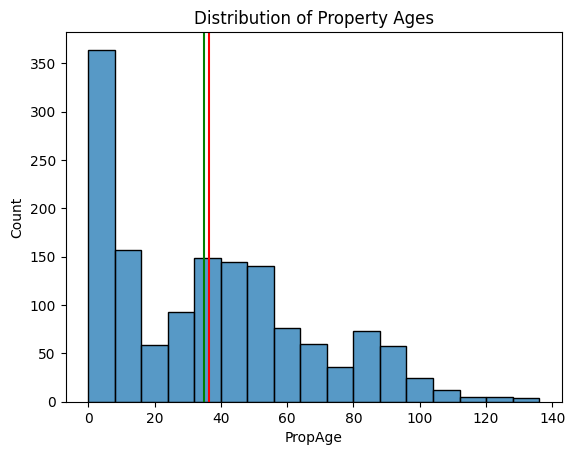

In [433]:
market_age_mean= train_data['PropAge'].mean()
market_age_med= train_data['PropAge'].median()
sns.histplot(train_data['PropAge'],fill=True)
plt.axvline(x=market_age_mean, color='r', linestyle='-')
plt.axvline(x=market_age_med, color='g', linestyle='-')
plt.title('Distribution of Property Ages')
plt.show()

Most of the data consists of properties aged between 0 and 25 years. The average property age in the dataset is approx. 34 years.

#### Encode Categorical Data

In [434]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = train_data.select_dtypes(['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(['float', 'int']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

one_hot_encoded = encoder.fit_transform(train_data[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))

one_hot_df = one_hot_df.reset_index(drop=True)
train_data = train_data.reset_index(drop=True)
df_encoded = pd.concat([train_data, one_hot_df], axis=1)

train_data = df_encoded.drop(categorical_cols, axis=1)

train_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0  1.0        60.0         65.0   8450.0          7.0          5.0 2003-01-01  \
1  2.0        20.0         80.0   9600.0          6.0          8.0 1976-01-01   
2  3.0        60.0         68.0  11250.0          7.0          5.0 2001-01-01   
3  4.0        70.0         60.0   9550.0          7.0          5.0 1915-01-01   
4  5.0        60.0         84.0  14260.0          8.0          5.0 2000-01-01   

  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0   2003-01-01       196.0       706.0         0.0      150.0        856.0  \
1   1976-01-01         0.0       978.0         0.0      284.0       1262.0   
2   2002-01-01       162.0       486.0         0.0      434.0        920.0   
3   1970-01-01         0.0       216.0         0.0      540.0        756.0   
4   2000-01-01       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0     856.0     854.0           0.0     1710.0           1.0           0.0  \
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       2.0       1.0           3.0           1.0           8.0         0.0  \
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0   
2            0.0        0.0          0.0       0.0      0.0     9.0   
3          272.0        0.0          0.0       0.0      0.0     2.0   
4            0.0        0.0          0.0       0.0      0.0    12.0   

      YrSold  SalePrice  Year_Built  Month_Built  Day_Built  Year_Remodelled   
0 2008-01-01   208500.0        2003            1          1             2003  \
1 2007-01-01   181500.0        1976            1          1             1976   
2 2008-01-01   223500.0        2001            1          1             2002   
3 2006-01-01   140000.0        1915            1          1             1970   
4 2008-01-01   250000.0        2000            1          1             2000   

   Month_Remodelled  Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  PropAge   
0                 1               1       2008           1         1        5  \
1                 1               1       2007           1         1       31   
2                 1               1       2008           1         1        7   
3                 1               1       2006           1         1       91   
4                 1               1       2008           1         1        8   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM   
0               0.0          0.0          0.0          1.0          0.0  \
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3     

### 🖥️ Model Selection 

Given that we are trying to predict future property sale prices, this is a regression problem. 

Regression is  a supervised learning type of problem. There are various types of regression models we could consider, such as:- 

- Linear regression: Assumes a linear relationship between the input features and the target variable. 
- Decision Tree Regression: Builds a decision tree to recursively partition the feature space into smaller regions.
- Random Forest Regression: An ensemble learning method that combines multiple decision trees. Provides better generalisation performance compared to a single decision tree.
- Gradient Boosting Regression: Another ensemble learning method where trees are built sequentially, with each tree correcting the errors of the previous ones. (e.g. XGBoost, LightBGM) 


The steps to building and using a model are:

1. Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
2. Fit: Capture patterns from provided data. This is the heart of modelling.
3. Predict: Just what it sounds like
4. Evaluate: Determine how accurate the model's predictions are.

### 🎯 Feature Selection using Random Forest Regression


#### Prepare training data for modelling 

In [435]:
train_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0  1.0        60.0         65.0   8450.0          7.0          5.0 2003-01-01  \
1  2.0        20.0         80.0   9600.0          6.0          8.0 1976-01-01   
2  3.0        60.0         68.0  11250.0          7.0          5.0 2001-01-01   
3  4.0        70.0         60.0   9550.0          7.0          5.0 1915-01-01   
4  5.0        60.0         84.0  14260.0          8.0          5.0 2000-01-01   

  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0   2003-01-01       196.0       706.0         0.0      150.0        856.0  \
1   1976-01-01         0.0       978.0         0.0      284.0       1262.0   
2   2002-01-01       162.0       486.0         0.0      434.0        920.0   
3   1970-01-01         0.0       216.0         0.0      540.0        756.0   
4   2000-01-01       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0     856.0     854.0           0.0     1710.0           1.0           0.0  \
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       2.0       1.0           3.0           1.0           8.0         0.0  \
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0   
2            0.0        0.0          0.0       0.0      0.0     9.0   
3          272.0        0.0          0.0       0.0      0.0     2.0   
4            0.0        0.0          0.0       0.0      0.0    12.0   

      YrSold  SalePrice  Year_Built  Month_Built  Day_Built  Year_Remodelled   
0 2008-01-01   208500.0        2003            1          1             2003  \
1 2007-01-01   181500.0        1976            1          1             1976   
2 2008-01-01   223500.0        2001            1          1             2002   
3 2006-01-01   140000.0        1915            1          1             1970   
4 2008-01-01   250000.0        2000            1          1             2000   

   Month_Remodelled  Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  PropAge   
0                 1               1       2008           1         1        5  \
1                 1               1       2007           1         1       31   
2                 1               1       2008           1         1        7   
3                 1               1       2006           1         1       91   
4                 1               1       2008           1         1        8   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM   
0               0.0          0.0          0.0          1.0          0.0  \
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3     

In [436]:
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

In [437]:
X = X.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)

In [438]:
X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0  1.0        60.0         65.0   8450.0          7.0          5.0  \
1  2.0        20.0         80.0   9600.0          6.0          8.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   
0       196.0       706.0         0.0      150.0        856.0     856.0  \
1         0.0       978.0         0.0      284.0       1262.0    1262.0   
2       162.0       486.0         0.0      434.0        920.0     920.0   
3         0.0       216.0         0.0      540.0        756.0     961.0   
4       350.0       655.0         0.0      490.0       1145.0    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath   
0     854.0           0.0     1710.0           1.0           0.0       2.0  \
1       0.0           0.0     1262.0           0.0           1.0       2.0   
2     866.0           0.0     1786.0           1.0           0.0       2.0   
3     756.0           0.0     1717.0           1.0           0.0       1.0   
4    1053.0           0.0     2198.0           1.0           0.0       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0       1.0           3.0           1.0           8.0         0.0  \
1       0.0           3.0           1.0           6.0         1.0   
2       1.0           3.0           1.0           6.0         1.0   
3       0.0           3.0           1.0           7.0         1.0   
4       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0         2.0       548.0         0.0         61.0  \
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0          0.0       0.0      0.0     2.0  \
1            0.0        0.0          0.0       0.0      0.0     5.0   
2            0.0        0.0          0.0       0.0      0.0     9.0   
3          272.0        0.0          0.0       0.0      0.0     2.0   
4            0.0        0.0          0.0       0.0      0.0    12.0   

   Year_Built  Month_Built  Day_Built  Year_Remodelled  Month_Remodelled   
0        2003            1          1             2003                 1  \
1        1976            1          1             1976                 1   
2        2001            1          1             2002                 1   
3        1915            1          1             1970                 1   
4        2000            1          1             2000                 1   

   Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  PropAge  MSZoning_C (all)   
0               1       2008           1         1        5               0.0  \
1               1       2007           1         1       31               0.0   
2               1       2008           1         1        7               0.0   
3               1       2006           1         1       91               0.0   
4               1       2008           1         1        8               0.0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl   
0          0.0          0.0          1.0          0.0          0.0  \
1          0.0          0.0          1.0          0.0          0.0   
2          0.0          0.0          1.0          0.0          0.0   
3          0.0          0.0          1.0          0.0          0.0   
4          0.0          0.0          1.0          0.0          0.0   

   Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_

In [439]:
#import libraries 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor


In [440]:
# train model - random forest regression 

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

#define model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#fit model 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [441]:
# Get the feature importances from the trained model
importances = regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [442]:
feature_importances

Feature  Importance
4              OverallQual   5.450e-01
14               GrLivArea   1.246e-01
7               BsmtFinSF1   3.473e-02
11                1stFlrSF   2.975e-02
10             TotalBsmtSF   2.942e-02
25              GarageArea   1.765e-02
3                  LotArea   1.649e-02
24              GarageCars   1.593e-02
245       GarageFinish_Unf   1.289e-02
184            BsmtQual_Ex   1.182e-02
12                2ndFlrSF   9.379e-03
21            TotRmsAbvGrd   8.540e-03
26              WoodDeckSF   8.124e-03
37         Year_Remodelled   7.246e-03
27             OpenPorchSF   7.170e-03
43                 PropAge   6.984e-03
34              Year_Built   6.754e-03
2              LotFrontage   6.197e-03
30             ScreenPorch   5.157e-03
22              Fireplaces   4.895e-03
9                BsmtUnfSF   4.340e-03
0                       Id   4.226e-03
23             GarageYrBlt   4.034e-03
6               MasVnrArea   3.959e-03
17                FullBath   3.777e-03
5              OverallCond   3.532e-03
169           ExterQual_Ex   3.343e-03
1               MSSubClass   2.926e-03
33                  MoSold   2.855e-03
186            BsmtQual_Gd   2.564e-03
54            LotShape_Reg   1.991e-03
242      GarageType_Detchd   1.920e-03
19            BedroomAbvGr   1.823e-03
40               Year_Sold   1.453e-03
219           CentralAir_N   1.452e-03
195        BsmtExposure_No   1.448e-03
55         LandContour_Bnk   1.401e-03
193        BsmtExposure_Gd   1.349e-03
228         KitchenQual_Gd   1.070e-03
15            BsmtFullBath   1.033e-03
229         KitchenQual_TA   9.985e-04
48             MSZoning_RM   9.774e-04
202       BsmtFinType2_ALQ   9.387e-04
238      GarageType_Attchd   9.113e-04
84    Neighborhood_NoRidge   8.579e-04
62       LotConfig_CulDSac   8.467e-04
175           ExterCond_Gd   8.360e-04
18                HalfBath   8.223e-04
243       GarageFinish_Fin   8.165e-04
96         Condition1_Norm   8.080e-04
91    Neighborhood_StoneBr   8.053e-04
220           CentralAir_Y   7.961e-04
75    Neighborhood_Crawfor   7.960e-04
265           SaleType_New   7.851e-04
144    Exterior1st_HdBoard   7.620e-04
47             MSZoning_RL   6.967e-04
198       BsmtFinType1_GLQ   6.190e-04
20            KitchenAbvGr   6.103e-04
187            BsmtQual_TA   6.072e-04
85    Neighborhood_NridgHt   6.020e-04
58         LandContour_Lvl   5.874e-04
66           LandSlope_Gtl   5.680e-04
51            LotShape_IR1   5.262e-04
161    Exterior2nd_MetalSd   5.226e-04
146    Exterior1st_MetalSd   5.045e-04
171           ExterQual_Gd   4.969e-04
272   SaleCondition_Normal   4.800e-04
90    Neighborhood_Somerst   4.579e-04
267            SaleType_WD   4.563e-04
271   SaleCondition_Family   4.549e-04
65        LotConfig_Inside   4.472e-04
8               BsmtFinSF2   4.409e-04
273  SaleCondition_Partial   4.376e-04
56         LandContour_HLS   4.355e-04
226         KitchenQual_Ex   4.341e-04
61        LotConfig_Corner   4.312e-04
131       RoofMatl_CompShg   4.198e-04
28           EnclosedPorch   4.161e-04
159    Exterior2nd_HdBoard   4.081e-04
125        RoofStyle_Gable   4.066e-04
172           ExterQual_TA   4.017e-04
141    Exterior1st_BrkFace   3.985e-04
156    Exterior2nd_BrkFace   3.763e-04
244       GarageFinish_RFn   3.762e-04
218           HeatingQC_TA   3.651e-04
179      Foundation_CBlock   3.641e-04
236         Functional_Typ   3.617e-04
177           ExterCond_TA   3.585e-04
29               3SsnPorch   3.428e-04
121      HouseStyle_2Story   3.415e-04
86    Neighborhood_OldTown   3.355e-04
127          RoofStyle_Hip   3.211e-04
166    Exterior2nd_VinylSd   3.148e-04
194        BsmtExposure_Mn   2.897e-04
201       BsmtFinType1_Unf   2.683e-04
268  SaleCondition_Abnorml   2.671e-04
216           HeatingQC_Gd   2.613e-04
167    Exterior2nd_Wd Sdng   2.573e-04
119      HouseStyle_2.5Fin   2.568e-04
74    Neighborhood_CollgCr   2.557e-04
258           PavedDrive_Y   2.533e-04
150    Exterior1st_VinylSd   2.484e-04
21

In [443]:
print(len(feature_importances))

274


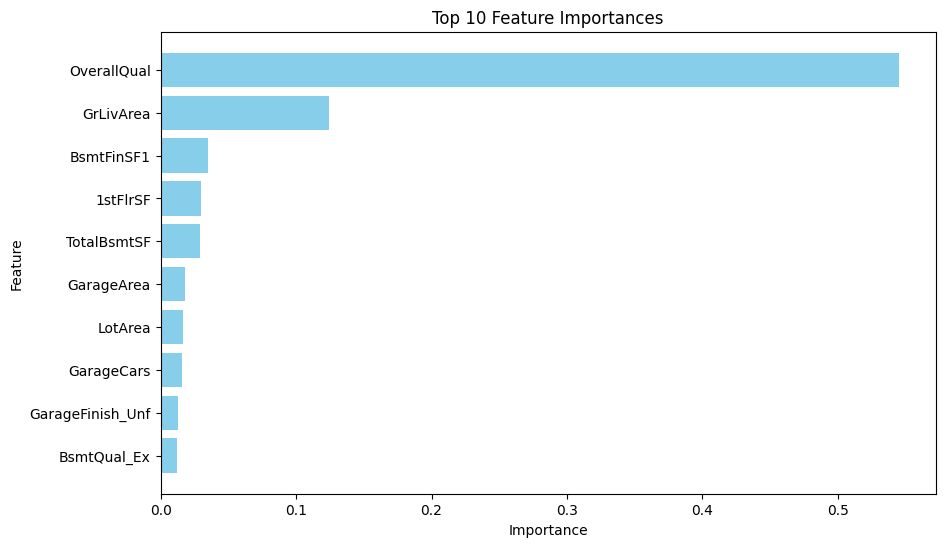

In [444]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [445]:
feature_importances[:20]

Feature  Importance
4         OverallQual       0.545
14          GrLivArea       0.125
7          BsmtFinSF1       0.035
11           1stFlrSF       0.030
10        TotalBsmtSF       0.029
25         GarageArea       0.018
3             LotArea       0.016
24         GarageCars       0.016
245  GarageFinish_Unf       0.013
184       BsmtQual_Ex       0.012
12           2ndFlrSF       0.009
21       TotRmsAbvGrd       0.009
26         WoodDeckSF       0.008
37    Year_Remodelled       0.007
27        OpenPorchSF       0.007
43            PropAge       0.007
34         Year_Built       0.007
2         LotFrontage       0.006
30        ScreenPorch       0.005
22         Fireplaces       0.005

#### Summary of Insights

From the above feature selection exercise, we can determine the top 10 features to include in our ML model:- 
    
1. Overall Quality
2. GF living area
3. Total basement sq.ft  
4. Number of full bathrooms 2nd floor sq.ft
5. Basement Type 1 finished sq.ft
6. 1st Floor sq.ft
7. Total Number of rooms GF 
8. Lot Area
9. 2nd Floor sq.ft
10. Garage Area


From our EDA the following features are worth including in our model: - 

- Lot Area
- GF living area
- Total Basement Sq/ft
- First Floor Sq/ft
- Garage Car capacity
- Garage Area
- Year Built
- Month sold
- Year sold 
- Overall Quality score
- Property age 
- Number of bedrooms above grade (excl. basement)
- Neighborhood
- Condition1 (proximity to rail or road)

There is some overlap between our feature selection exercise and EDA findings. 

## 🧪 Random Forest Regression Model Evaluation 

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [446]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [447]:
# train model - random forest regression 

from sklearn.ensemble import RandomForestRegressor

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
#define model
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
#fit model 
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [448]:
y_pred = regressor.predict(X_test)

In [449]:
# Evaluating the model

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Test Random Forest Regression MSE: {mse}')

# RMSE
rmsle_test = mean_squared_log_error(y_test, y_pred)** 0.5
print(f'Test Random Forest Regression RMSLE: {rmsle_test: 5f}')

# R2
r2 = r2_score(y_test, y_pred)
print(f'Test Random Forest Regression R-squared: {r2}')

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Random Forest Regression MAE: {mae}')

Test Random Forest Regression MSE: 1001442124.5474144
Test Random Forest Regression RMSLE:  0.145869
Test Random Forest Regression R-squared: 0.863589601022638
Test Random Forest Regression MAE: 17898.80489626556


#### Summary

- Mean Squared Error (MSE) - measures how well a regression model predicts the actual values. It takes the average of the squared differences between predicted values and actual values. The lower the MSE, the closer the predictions are to the actual values. 


- Root Mean Squared Log Error (RMSLE) - measures the error between the predicted and actual values, but takes the log of the predictions and actual values before calculating the error. More suited to calculating relative differences (e.g. predicting sales numbers where some values can be significantly larger than others). 


- R-squared - measures the goodness-of-fit. It shows explains how much of the target variable's variance is captured by the model (higher is better). 


- Mean Absolute Error (MAE) - measures the averafe of the absolute differences between the predicted and actual values. 



The MAE value gives us a clear and simple evaluation of the model, since it offers a direct measure of dollars to dollars. The test data has a RMSLE of 0.14 and a MAE of $17,898.80 which indicates good performance by the Random Forest Regression Model.

### 🎯🧪 Random Forest Regression Model with Select Features

In [450]:
top_k = 100
top_features = feature_importances['Feature'][:top_k].values

X_train_selected =  X_train[top_features]
X_test_selected = X_test[top_features]

#re-train the model with only the top k features
regressor_selected = RandomForestRegressor(n_estimators=400, random_state=42, oob_score=True)
regressor_selected.fit(X_train_selected, y_train)


RandomForestRegressor(n_estimators=400, oob_score=True, random_state=42)

In [451]:
y_pred_selected = regressor_selected.predict(X_test_selected)

In [452]:
# Evaluating the model

# MSE
mse = mean_squared_error(y_test, y_pred_selected)
print(f'Test Random Forest Regression MSE with top {top_k} features: {mse}')

# RMSLE
rmsle_test = mean_squared_log_error(y_test, y_pred_selected)** 0.5
print(f'Test Random Forest Regression RMSLE with top {top_k} features: {rmsle_test: 5f}')

#R2
r2 = r2_score(y_test, y_pred_selected)
print(f'Test Random Forest Regression R-squared with top {top_k} features: {r2}')

# MAE
mae = mean_absolute_error(y_test, y_pred_selected)
print(f'Test Random Forest Regression MAE with top {top_k} features: {mae}')

Test Random Forest Regression MSE with top 100 features: 992613079.3932353
Test Random Forest Regression RMSLE with top 100 features:  0.145340
Test Random Forest Regression R-squared with top 100 features: 0.8647922402391728
Test Random Forest Regression MAE with top 100 features: 17708.45002593361


## 🔧 Fine Tuning Random Forest Regression Model

#### Apply SelectKBest 

In [453]:
# Train model on selected features 

k = 180
selector = SelectKBest(score_func=f_regression, k=k)

X_train_selected =  selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [454]:
regressor_kbest = RandomForestRegressor(n_estimators=400, random_state=42)
regressor_kbest.fit(X_train_selected, y_train)
y_pred_kbest = regressor_kbest.predict(X_test_selected)

In [455]:

# MSE
mse = mean_squared_error(y_test, y_pred_kbest)
print(f'Test Random Forest Regression MSE with top {k} features: {mse}')

# RMSLE
rmsle_test = mean_squared_log_error(y_test, y_pred_kbest)** 0.5
print(f'Test Random Forest Regression RMSLE with top {k} features: {rmsle_test: 5f}')

#R2
r2 = r2_score(y_test, y_pred_kbest)
print(f'Test Random Forest Regression R-squared with top {k} features: {r2}')

# MAE
mae = mean_absolute_error(y_test, y_pred_kbest)
print(f'Test Random Forest Regression MAE with top {k} features: {mae}')

Test Random Forest Regression MSE with top 180 features: 987457506.7915561
Test Random Forest Regression RMSLE with top 180 features:  0.144673
Test Random Forest Regression R-squared with top 180 features: 0.8654945012069444
Test Random Forest Regression MAE with top 180 features: 17582.04356846473


By tweaking the parameters, the MAE value has come down to $17,582.04 and improved the overall accuracy of our model. Let's implement "regressor_kbest" model with selected features on our test data.

### 🚀 Let's apply Random Forest to the test data ... 

### Review test data

In [456]:
test_data = pd.read_csv(r"C:\Users\Krupa\Downloads\test.csv")
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0  1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     1Story            5            6       1961  \
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN  \
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0         0.0        TA        TA     CBlock       TA       TA           No  \
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          Rec       468.0          LwQ       144.0      270.0        882.0  \
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        TA          Y      SBrkr       896         0             0  \
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0        896           0.0           0.0         1         0             2  \
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          TA             5        Typ           0         NaN  \
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [457]:
check_data(test_data)

column    dtype  instances  unique  missing_vals  duplicates
0              Id    int64       1459    1459             0           0
1      MSSubClass    int64       1459      16             0           0
2        MSZoning   object       1455       5             4           0
3     LotFrontage  float64       1232     115           227           0
4         LotArea    int64       1459    1106             0           0
5          Street   object       1459       2             0           0
6           Alley   object        107       2          1352           0
7        LotShape   object       1459       4             0           0
8     LandContour   object       1459       4             0           0
9       Utilities   object       1457       1             2           0
10      LotConfig   object       1459       5             0           0
11      LandSlope   object       1459       3             0           0
12   Neighborhood   object       1459      25             0           0
13     Condition1   object       1459       9             0           0
14     Condition2   object       1459       5             0           0
15       BldgType   object       1459       5             0           0
16     HouseStyle   object       1459       7             0           0
17    OverallQual    int64       1459      10             0           0
18    OverallCond    int64       1459       9             0           0
19      YearBuilt    int64       1459     106             0           0
20   YearRemodAdd    int64       1459      61             0           0
21      RoofStyle   object       1459       6             0           0
22       RoofMatl   object       1459       4             0           0
23    Exterior1st   object       1458      13             1           0
24    Exterior2nd   object       1458      15             1           0
25     MasVnrType   object        565       3           894           0
26     MasVnrArea  float64       1444     303            15           0
27      ExterQual   object       1459       4             0           0
28      ExterCond   object       1459       5             0           0
29     Foundation   object       1459       6             0           0
30       BsmtQual   object       1415       4            44           0
31       BsmtCond   object       1414       4            45           0
32   BsmtExposure   object       1415       4            44           0
33   BsmtFinType1   object       1417       6            42           0
34     BsmtFinSF1  float64       1458     669             1           0
35   BsmtFinType2   object       1417       6            42           0
36     BsmtFinSF2  float64       1458     161             1           0
37      BsmtUnfSF  float64       1458     793             1           0
38    TotalBsmtSF  float64       1458     736             1           0
39        Heating   object       1459       4             0           0
40      HeatingQC   object       1459       5             0           0
41     CentralAir   object       1459       2             0           0
42     Electrical   object       1459       4             0           0
43       1stFlrSF    int64       1459     789             0           0
44       2ndFlrSF    int64       1459     407             0           0
45   LowQualFinSF    int64       1459      15             0           0
46      GrLivArea    int64       1459     879             0           0
47   BsmtFullBath  float64       1457       4             2           0
48   BsmtHalfBath  float64       1457       3             2           0
49       FullBath    int64       1459       5             0           0
50       HalfBath    int64       1459       3             0           0
51   BedroomAbvGr    int64       1459       7             0           0
52   KitchenAbvGr    int64       1459       3             0           0
53    KitchenQual   object       1458       4             1           0
54   TotRmsAbvGrd    int64       1459      12      

#### Handle missing values in test data

In [458]:
test_data.shape

(1459, 80)

In [459]:
# drop columns with large number of missing values
test_data.drop(columns=['PoolQC','Alley','Fence','MiscFeature','MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [460]:
# Identify numeric and categorical columns
numeric_features = test_data.select_dtypes(include=['int64', 'float64']).columns

categorical_features = test_data.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

# Fit on training data
imputed_testdata = preprocessor.fit_transform(test_data)

# Convert the result back to a dataframe
imputed_testdf = pd.DataFrame(imputed_testdata, columns=numeric_features.tolist() + categorical_features.tolist())

In [461]:
imputed_testdf.head()

Id MSSubClass LotFrontage  LotArea OverallQual OverallCond YearBuilt   
0  1461.0       20.0        80.0  11622.0         5.0         6.0    1961.0  \
1  1462.0       20.0        81.0  14267.0         6.0         6.0    1958.0   
2  1463.0       60.0        74.0  13830.0         5.0         5.0    1997.0   
3  1464.0       60.0        78.0   9978.0         6.0         6.0    1998.0   
4  1465.0      120.0        43.0   5005.0         8.0         5.0    1992.0   

  YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF   
0       1961.0        0.0      468.0      144.0     270.0       882.0  \
1       1958.0      108.0      923.0        0.0     406.0      1329.0   
2       1998.0        0.0      791.0        0.0     137.0       928.0   
3       1998.0       20.0      602.0        0.0     324.0       926.0   
4       1992.0        0.0      263.0        0.0    1017.0      1280.0   

  1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath   
0    896.0      0.0          0.0     896.0          0.0          0.0      1.0  \
1   1329.0      0.0          0.0    1329.0          0.0          0.0      1.0   
2    928.0    701.0          0.0    1629.0          0.0          0.0      2.0   
3    926.0    678.0          0.0    1604.0          0.0          0.0      2.0   
4   1280.0      0.0          0.0    1280.0          0.0          0.0      2.0   

  HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt   
0      0.0          2.0          1.0          5.0        0.0      1961.0  \
1      1.0          3.0          1.0          6.0        0.0      1958.0   
2      1.0          3.0          1.0          6.0        1.0      1997.0   
3      1.0          3.0          1.0          7.0        1.0      1998.0   
4      0.0          2.0          1.0          5.0        0.0      1992.0   

  GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch   
0        1.0      730.0      140.0         0.0           0.0       0.0  \
1        1.0      312.0      393.0        36.0           0.0       0.0   
2        2.0      482.0      212.0        34.0           0.0       0.0   
3        2.0      470.0      360.0        36.0           0.0       0.0   
4        2.0      506.0        0.0        82.0           0.0       0.0   

  ScreenPorch PoolArea  MiscVal MoSold  YrSold MSZoning Street LotShape   
0       120.0      0.0      0.0    6.0  2010.0       RH   Pave      Reg  \
1         0.0      0.0  12500.0    6.0  2010.0       RL   Pave      IR1   
2         0.0      0.0      0.0    3.0  2010.0       RL   Pave      IR1   
3         0.0      0.0      0.0    6.0  2010.0       RL   Pave      IR1   
4       144.0      0.0      0.0    1.0  2010.0       RL   Pave      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd   
0       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd  \
1       Norm     1Fam     1Story       Hip  CompShg     Wd Sdng     Wd Sdng   
2       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
4       Norm   TwnhsE     1Story     Gable  CompShg     HdBoard     HdBoard   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1   
0        TA        TA     CBlock       TA       TA           No          Rec  \
1        TA        TA     CBlock       TA       TA           No          ALQ   
2        TA        TA      PConc       Gd       TA           No          GLQ   
3        TA        TA      PCon

In [462]:
test_data[numeric_features.tolist()+categorical_features.tolist()].dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
MSZoning          object
Street            object
LotShape          object


In [463]:
imputed_testdf.dtypes

Id               object
MSSubClass       object
LotFrontage      object
LotArea          object
OverallQual      object
OverallCond      object
YearBuilt        object
YearRemodAdd     object
MasVnrArea       object
BsmtFinSF1       object
BsmtFinSF2       object
BsmtUnfSF        object
TotalBsmtSF      object
1stFlrSF         object
2ndFlrSF         object
LowQualFinSF     object
GrLivArea        object
BsmtFullBath     object
BsmtHalfBath     object
FullBath         object
HalfBath         object
BedroomAbvGr     object
KitchenAbvGr     object
TotRmsAbvGrd     object
Fireplaces       object
GarageYrBlt      object
GarageCars       object
GarageArea       object
WoodDeckSF       object
OpenPorchSF      object
EnclosedPorch    object
3SsnPorch        object
ScreenPorch      object
PoolArea         object
MiscVal          object
MoSold           object
YrSold           object
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities       

In [464]:
#correct dtypes of imputed columns 
imputed_testdf[numeric_features] = imputed_testdf[numeric_features].astype(float)

In [465]:
test_data_imp = pd.concat([imputed_testdf, test_data.drop(categorical_features.tolist()+ numeric_features.tolist(), axis=1)], axis=1)
test_data = test_data_imp 
test_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0  1461.0        20.0         80.0  11622.0          5.0          6.0  \
1  1462.0        20.0         81.0  14267.0          6.0          6.0   
2  1463.0        60.0         74.0  13830.0          5.0          5.0   
3  1464.0        60.0         78.0   9978.0          6.0          6.0   
4  1465.0       120.0         43.0   5005.0          8.0          5.0   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
0     1961.0        1961.0         0.0       468.0       144.0      270.0  \
1     1958.0        1958.0       108.0       923.0         0.0      406.0   
2     1997.0        1998.0         0.0       791.0         0.0      137.0   
3     1998.0        1998.0        20.0       602.0         0.0      324.0   
4     1992.0        1992.0         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath   
0        882.0     896.0       0.0           0.0      896.0           0.0  \
1       1329.0    1329.0       0.0           0.0     1329.0           0.0   
2        928.0     928.0     701.0           0.0     1629.0           0.0   
3        926.0     926.0     678.0           0.0     1604.0           0.0   
4       1280.0    1280.0       0.0           0.0     1280.0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   
0           0.0       1.0       0.0           2.0           1.0           5.0  \
1           0.0       1.0       1.0           3.0           1.0           6.0   
2           0.0       2.0       1.0           3.0           1.0           6.0   
3           0.0       2.0       1.0           3.0           1.0           7.0   
4           0.0       2.0       0.0           2.0           1.0           5.0   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0         0.0       1961.0         1.0       730.0       140.0          0.0  \
1         0.0       1958.0         1.0       312.0       393.0         36.0   
2         1.0       1997.0         2.0       482.0       212.0         34.0   
3         1.0       1998.0         2.0       470.0       360.0         36.0   
4         0.0       1992.0         2.0       506.0         0.0         82.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0            0.0        0.0        120.0       0.0      0.0     6.0  2010.0  \
1            0.0        0.0          0.0       0.0  12500.0     6.0  2010.0   
2            0.0        0.0          0.0       0.0      0.0     3.0  2010.0   
3            0.0        0.0          0.0       0.0      0.0     6.0  2010.0   
4            0.0        0.0        144.0       0.0      0.0     1.0  2010.0   

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope   
0       RH   Pave      Reg         Lvl    AllPub    Inside       Gtl  \
1       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg  \
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond   
0     VinylSd     VinylSd        TA        TA     CBlock       TA       TA  \
1     Wd Sdng     Wd Sdng        TA        TA     CBlock       TA       TA   
2     VinylSd     VinylSd        TA        TA      PConc       

#### Pre process date columns in test data 

In [466]:
#change to date columns to datetime 
test_data['YearBuilt'] = pd.to_datetime(test_data['YearBuilt'], format='%Y')
test_data['YearRemodAdd'] = pd.to_datetime(test_data['YearRemodAdd'], format='%Y')
test_data['YrSold'] = pd.to_datetime(test_data['YrSold'], format='%Y')

In [467]:
test_data['Year_Built'] = test_data['YearBuilt'].dt.year
test_data['Month_Built'] = test_data['YearBuilt'].dt.month
test_data['Day_Built'] = test_data['YearBuilt'].dt.day

test_data['Year_Remodelled'] = test_data['YearRemodAdd'].dt.year
test_data['Month_Remodelled'] = test_data['YearRemodAdd'].dt.month
test_data['Day_Remodelled'] = test_data['YearRemodAdd'].dt.day

test_data['Year_Sold'] = test_data['YrSold'].dt.year
test_data['Month_Sold'] = test_data['YrSold'].dt.month
test_data['Day_Sold'] = test_data['YrSold'].dt.day

In [468]:
test_data['PropAge'] = (test_data['YrSold'].dt.year - test_data['YearBuilt'].dt.year)

In [469]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1

In [470]:
test_data.shape

(1459, 84)

#### Encode test data

In [471]:
categorical_cols = test_data.select_dtypes(['object']).columns.tolist()
numerical_cols = test_data.select_dtypes(['float', 'int']).columns.tolist()

In [472]:
X_test = test_data
X_test = X_test.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)

In [473]:
#one hot encode new test data using the same encoder from training data 
X_test_encoded = encoder.transform(X_test[categorical_cols])

In [474]:
ohe_test_df = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names_out(categorical_cols))
ohe_test_df = ohe_test_df.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [475]:
ohe_test_df.shape

(1459, 230)

In [476]:
encoded_test_df = pd.concat([test_data.drop(categorical_cols, axis=1), ohe_test_df], axis=1)
test_data = encoded_test_df
#.drop(categorical_cols, axis=1)
test_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0  1461.0        20.0         80.0  11622.0          5.0          6.0  \
1  1462.0        20.0         81.0  14267.0          6.0          6.0   
2  1463.0        60.0         74.0  13830.0          5.0          5.0   
3  1464.0        60.0         78.0   9978.0          6.0          6.0   
4  1465.0       120.0         43.0   5005.0          8.0          5.0   

   YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
0 1961-01-01   1961-01-01         0.0       468.0       144.0      270.0  \
1 1958-01-01   1958-01-01       108.0       923.0         0.0      406.0   
2 1997-01-01   1998-01-01         0.0       791.0         0.0      137.0   
3 1998-01-01   1998-01-01        20.0       602.0         0.0      324.0   
4 1992-01-01   1992-01-01         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath   
0        882.0     896.0       0.0           0.0      896.0           0.0  \
1       1329.0    1329.0       0.0           0.0     1329.0           0.0   
2        928.0     928.0     701.0           0.0     1629.0           0.0   
3        926.0     926.0     678.0           0.0     1604.0           0.0   
4       1280.0    1280.0       0.0           0.0     1280.0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   
0           0.0       1.0       0.0           2.0           1.0           5.0  \
1           0.0       1.0       1.0           3.0           1.0           6.0   
2           0.0       2.0       1.0           3.0           1.0           6.0   
3           0.0       2.0       1.0           3.0           1.0           7.0   
4           0.0       2.0       0.0           2.0           1.0           5.0   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0         0.0       1961.0         1.0       730.0       140.0          0.0  \
1         0.0       1958.0         1.0       312.0       393.0         36.0   
2         1.0       1997.0         2.0       482.0       212.0         34.0   
3         1.0       1998.0         2.0       470.0       360.0         36.0   
4         0.0       1992.0         2.0       506.0         0.0         82.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   
0            0.0        0.0        120.0       0.0      0.0     6.0  \
1            0.0        0.0          0.0       0.0  12500.0     6.0   
2            0.0        0.0          0.0       0.0      0.0     3.0   
3            0.0        0.0          0.0       0.0      0.0     6.0   
4            0.0        0.0        144.0       0.0      0.0     1.0   

      YrSold  Year_Built  Month_Built  Day_Built  Year_Remodelled   
0 2010-01-01        1961            1          1             1961  \
1 2010-01-01        1958            1          1             1958   
2 2010-01-01        1997            1          1             1998   
3 2010-01-01        1998            1          1             1998   
4 2010-01-01        1992            1          1             1992   

   Month_Remodelled  Day_Remodelled  Year_Sold  Month_Sold  Day_Sold  PropAge   
0                 1               1       2010           1         1       49  \
1                 1               1       2010           1         1       52   
2                 1               1       2010           1         1       13   
3                 1               1       2010           1         1       12   
4                 1               1       2010           1         1       18   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM   
0               0.0          0.0          1.0          0.0          0.0  \
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.

In [477]:
test_data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
Y

In [478]:
test_data.shape

(1459, 277)

### 🌳 Apply RF Regression model with selected features to test data 

In [479]:
# = X_test.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)
X_test = test_data.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)

In [480]:
X_test_selected = selector.transform(X_test)

In [481]:
property_id=test_data['Id']

In [482]:
print(type(property_id))

<class 'pandas.core.series.Series'>


In [483]:
test_predictions = regressor_kbest.predict(X_test_selected)
output_df = pd.DataFrame({'Id': property_id, 'SalePrice':test_predictions})

In [485]:
output_df.head()

Id   SalePrice
0  1461.0  128357.150
1  1462.0  153814.705
2  1463.0  190447.620
3  1464.0  188092.682
4  1465.0  202047.263

In [486]:
output_df['Id'] = output_df['Id'].astype('int32')
#imputed_testdf[numeric_features] = imputed_testdf[numeric_features].astype(float)

In [487]:
output_df.to_csv('submission6.csv', index=False)

In conclusion, the adjustments made to the Random Forest Regression model have improved accuracy and reduced overfitting. Further improvements could be made in a number of ways, such as :-

- further data preprocessing 
- further EDA for feature selction 
- combining Random Forest with other models (i.e. Gradient Boosting, XGBoost etc.)
    

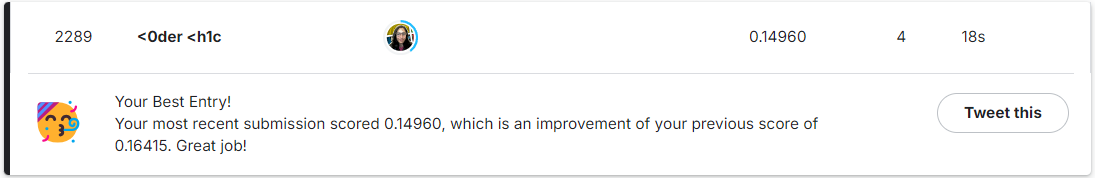

Thank you for reading! 